## Autocorrelation: seasonal patterns can be identified
## Partial autocorrelations: examine serial dependencies, dependence on the intermediate elements(within lags) is removed

#### •Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter
#### •Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters
#### •Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter.
#### •Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.
#### •Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.
#### https://bicorner.com/2015/11/16/time-series-analysis-using-ipython/

## Better rules summary
### http://people.duke.edu/~rnau/arimrule.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
data = pd.read_csv("C:/Users/msteinme/Documents/ureascenarios.csv")
#model part
data = data[['Date','Urea']][0:1056]
data.tail()

,Date,Urea
1051,2/26/2016,265
1052,3/4/2016,270
1053,3/11/2016,274
1054,3/18/2016,265
1055,3/25/2016,255


In [2]:
from datetime import datetime
data['Date'] = pd.to_datetime(data['Date'])
date = data['Date']
data.dtypes

Date    datetime64[ns]
Urea           float64
dtype: object

In [3]:
jan_96 = data[['Date','Urea']][0:4]
feb_96 = data[['Date','Urea']][4:8]
mar_96 = data[['Date','Urea']][8:13]
apr_96 = data[['Date','Urea']][13:17]
may_96 = data[['Date','Urea']][17:22]
jun_96 = data[['Date','Urea']][22:26]
jul_96 = data[['Date','Urea']][26:30]
aug_96 = data[['Date','Urea']][30:35]
sep_96 = data[['Date','Urea']][35:39]
oct_96 = data[['Date','Urea']][39:43]
nov_96 = data[['Date','Urea']][43:48]
dec_96 = data[['Date','Urea']][48:52]
jan_97 = data[['Date','Urea']][52:57]
feb_97 = data[['Date','Urea']][57:61]
mar_97 = data[['Date','Urea']][61:65]
apr_97 = data[['Date','Urea']][65:69]
may_97 = data[['Date','Urea']][69:74]
jun_97 = data[['Date','Urea']][74:78]
jul_97 = data[['Date','Urea']][78:82]
aug_97 = data[['Date','Urea']][82:87]
sep_97 = data[['Date','Urea']][87:91]
oct_97 = data[['Date','Urea']][91:96]
nov_97 = data[['Date','Urea']][96:100]
dec_97 = data[['Date','Urea']][100:104]
jan_98 = data[['Date','Urea']][104:109]
feb_98 = data[['Date','Urea']][109:113]
mar_98 = data[['Date','Urea']][113:117]
apr_98 = data[['Date','Urea']][117:121]
may_98 = data[['Date','Urea']][121:126]
jun_98 = data[['Date','Urea']][126:130]
jul_98 = data[['Date','Urea']][130:135]
aug_98 = data[['Date','Urea']][135:139]
sep_98 = data[['Date','Urea']][139:143]
oct_98 = data[['Date','Urea']][143:148]
nov_98 = data[['Date','Urea']][148:152]
dec_98 = data[['Date','Urea']][152:156]
jan_99 = data[['Date','Urea']][156:161]
feb_99 = data[['Date','Urea']][161:165]
mar_99 = data[['Date','Urea']][165:169]
apr_99 = data[['Date','Urea']][169:174]
may_99 = data[['Date','Urea']][174:178]
jun_99 = data[['Date','Urea']][178:182]
jul_99 = data[['Date','Urea']][182:187]
aug_99 = data[['Date','Urea']][187:191]
sep_99 = data[['Date','Urea']][191:195]
oct_99 = data[['Date','Urea']][195:200]
nov_99 = data[['Date','Urea']][200:204]
dec_99 = data[['Date','Urea']][204:209]
jan_00 = data[['Date','Urea']][209:213]
feb_00 = data[['Date','Urea']][213:217]
mar_00 = data[['Date','Urea']][217:222]
apr_00 = data[['Date','Urea']][222:226]
may_00 = data[['Date','Urea']][226:230]
jun_00 = data[['Date','Urea']][230:235]
jul_00 = data[['Date','Urea']][235:239]
aug_00 = data[['Date','Urea']][239:243]
sep_00 = data[['Date','Urea']][243:248]
oct_00 = data[['Date','Urea']][248:252]
nov_00 = data[['Date','Urea']][252:256]
dec_00 = data[['Date','Urea']][256:261]
jan_01 = data[['Date','Urea']][261:265]
feb_01 = data[['Date','Urea']][265:269]
mar_01 = data[['Date','Urea']][269:274]
apr_01 = data[['Date','Urea']][274:278]
may_01 = data[['Date','Urea']][278:282]
jun_01 = data[['Date','Urea']][282:287]
jul_01 = data[['Date','Urea']][287:291]
aug_01 = data[['Date','Urea']][291:296]
sep_01 = data[['Date','Urea']][296:300]
oct_01 = data[['Date','Urea']][300:304]
nov_01 = data[['Date','Urea']][304:309]
dec_01 = data[['Date','Urea']][309:313]
jan_02 = data[['Date','Urea']][313:317]
feb_02 = data[['Date','Urea']][317:321]
mar_02 = data[['Date','Urea']][321:326]
apr_02 = data[['Date','Urea']][326:330]
may_02 = data[['Date','Urea']][330:335]
jun_02 = data[['Date','Urea']][335:339]
jul_02 = data[['Date','Urea']][339:343]
aug_02 = data[['Date','Urea']][343:348]
sep_02 = data[['Date','Urea']][348:352]
oct_02 = data[['Date','Urea']][352:356]
nov_02 = data[['Date','Urea']][356:361]
dec_02 = data[['Date','Urea']][361:365]
jan_03 = data[['Date','Urea']][365:370]
feb_03 = data[['Date','Urea']][370:374]
mar_03 = data[['Date','Urea']][374:378]
apr_03 = data[['Date','Urea']][378:382]
may_03 = data[['Date','Urea']][382:387]
jun_03 = data[['Date','Urea']][387:391]
jul_03 = data[['Date','Urea']][391:395]
aug_03 = data[['Date','Urea']][395:400]
sep_03 = data[['Date','Urea']][400:404]
oct_03 = data[['Date','Urea']][404:409]
nov_03 = data[['Date','Urea']][409:413]
dec_03 = data[['Date','Urea']][413:417]
jan_04 = data[['Date','Urea']][417:422]
feb_04 = data[['Date','Urea']][422:426]
mar_04 = data[['Date','Urea']][426:430]
apr_04 = data[['Date','Urea']][430:435]
may_04 = data[['Date','Urea']][435:439]
jun_04 = data[['Date','Urea']][439:443]
jul_04 = data[['Date','Urea']][443:448]
aug_04 = data[['Date','Urea']][448:452]
sep_04 = data[['Date','Urea']][452:456]
oct_04 = data[['Date','Urea']][456:461]
nov_04 = data[['Date','Urea']][461:465]
dec_04 = data[['Date','Urea']][465:470]
jan_05 = data[['Date','Urea']][470:474]
feb_05 = data[['Date','Urea']][474:478]
mar_05 = data[['Date','Urea']][478:482]
apr_05 = data[['Date','Urea']][482:487]
may_05 = data[['Date','Urea']][487:491]
jun_05 = data[['Date','Urea']][491:495]
jul_05 = data[['Date','Urea']][495:500]
aug_05 = data[['Date','Urea']][500:504]
sep_05 = data[['Date','Urea']][504:509]
oct_05 = data[['Date','Urea']][509:513]
nov_05 = data[['Date','Urea']][513:517]
dec_05 = data[['Date','Urea']][517:522]
jan_06 = data[['Date','Urea']][522:526]
feb_06 = data[['Date','Urea']][526:530]
mar_06 = data[['Date','Urea']][530:535]
apr_06 = data[['Date','Urea']][535:539]
may_06 = data[['Date','Urea']][539:543]
jun_06 = data[['Date','Urea']][543:548]
jul_06 = data[['Date','Urea']][548:552]
aug_06 = data[['Date','Urea']][552:556]
sep_06 = data[['Date','Urea']][556:561]
oct_06 = data[['Date','Urea']][561:565]
nov_06 = data[['Date','Urea']][565:569]
dec_06 = data[['Date','Urea']][569:574]
jan_07 = data[['Date','Urea']][574:578]
feb_07 = data[['Date','Urea']][578:582]
mar_07 = data[['Date','Urea']][582:587]
apr_07 = data[['Date','Urea']][587:591]
may_07 = data[['Date','Urea']][591:595]
jun_07 = data[['Date','Urea']][595:600]
jul_07 = data[['Date','Urea']][600:604]
aug_07 = data[['Date','Urea']][604:609]
sep_07 = data[['Date','Urea']][609:613]
oct_07 = data[['Date','Urea']][613:617]
nov_07 = data[['Date','Urea']][617:622]
dec_07 = data[['Date','Urea']][622:626]
jan_08 = data[['Date','Urea']][626:630]
feb_08 = data[['Date','Urea']][630:635]
mar_08 = data[['Date','Urea']][635:639]
apr_08 = data[['Date','Urea']][639:643]
may_08 = data[['Date','Urea']][643:648]
jun_08 = data[['Date','Urea']][648:652]
jul_08 = data[['Date','Urea']][652:656]
aug_08 = data[['Date','Urea']][656:661]
sep_08 = data[['Date','Urea']][661:665]
oct_08 = data[['Date','Urea']][665:670]
nov_08 = data[['Date','Urea']][670:674]
dec_08 = data[['Date','Urea']][674:678]
jan_09 = data[['Date','Urea']][678:683]
feb_09 = data[['Date','Urea']][683:687]
mar_09 = data[['Date','Urea']][687:691]
apr_09 = data[['Date','Urea']][691:695]
may_09 = data[['Date','Urea']][695:700]
jun_09 = data[['Date','Urea']][700:704]
jul_09 = data[['Date','Urea']][704:709]
aug_09 = data[['Date','Urea']][709:713]
sep_09 = data[['Date','Urea']][713:717]
oct_09 = data[['Date','Urea']][717:722]
nov_09 = data[['Date','Urea']][722:726]
dec_09 = data[['Date','Urea']][726:730]
jan_10 = data[['Date','Urea']][730:735]
feb_10 = data[['Date','Urea']][735:739]
mar_10 = data[['Date','Urea']][739:743]
apr_10 = data[['Date','Urea']][743:748]
may_10 = data[['Date','Urea']][748:752]
jun_10 = data[['Date','Urea']][752:756]
jul_10 = data[['Date','Urea']][756:761]
aug_10 = data[['Date','Urea']][761:765]
sep_10 = data[['Date','Urea']][765:769]
oct_10 = data[['Date','Urea']][769:774]
nov_10 = data[['Date','Urea']][774:778]
dec_10 = data[['Date','Urea']][778:783]
jan_11 = data[['Date','Urea']][783:787]
feb_11 = data[['Date','Urea']][787:791]
mar_11 = data[['Date','Urea']][791:795]
apr_11 = data[['Date','Urea']][795:800]
may_11 = data[['Date','Urea']][800:804]
jun_11 = data[['Date','Urea']][804:808]
jul_11 = data[['Date','Urea']][808:813]
aug_11 = data[['Date','Urea']][813:817]
sep_11 = data[['Date','Urea']][817:822]
oct_11 = data[['Date','Urea']][822:826]
nov_11 = data[['Date','Urea']][826:830]
dec_11 = data[['Date','Urea']][830:835]
jan_12 = data[['Date','Urea']][835:839]
feb_12 = data[['Date','Urea']][839:843]
mar_12 = data[['Date','Urea']][843:848]
apr_12 = data[['Date','Urea']][848:852]
may_12 = data[['Date','Urea']][852:856]
jun_12 = data[['Date','Urea']][856:861]
jul_12 = data[['Date','Urea']][861:865]
aug_12 = data[['Date','Urea']][865:870]
sep_12 = data[['Date','Urea']][870:874]
oct_12 = data[['Date','Urea']][874:878]
nov_12 = data[['Date','Urea']][878:883]
dec_12 = data[['Date','Urea']][883:887]
jan_13 = data[['Date','Urea']][887:891]
feb_13 = data[['Date','Urea']][891:895]
mar_13 = data[['Date','Urea']][895:900]
apr_13 = data[['Date','Urea']][900:904]
may_13 = data[['Date','Urea']][904:909]
jun_13 = data[['Date','Urea']][909:913]
jul_13 = data[['Date','Urea']][913:917]
aug_13 = data[['Date','Urea']][917:922]
sep_13 = data[['Date','Urea']][922:926]
oct_13 = data[['Date','Urea']][926:930]
nov_13 = data[['Date','Urea']][930:935]
dec_13 = data[['Date','Urea']][935:939]
jan_14 = data[['Date','Urea']][939:944]
feb_14 = data[['Date','Urea']][944:948]
mar_14 = data[['Date','Urea']][948:952]
apr_14 = data[['Date','Urea']][952:956]
may_14 = data[['Date','Urea']][956:961]
jun_14 = data[['Date','Urea']][961:965]
jul_14 = data[['Date','Urea']][965:969]
aug_14 = data[['Date','Urea']][969:974]
sep_14 = data[['Date','Urea']][974:978]
oct_14 = data[['Date','Urea']][978:983]
nov_14 = data[['Date','Urea']][983:987]
dec_14 = data[['Date','Urea']][987:991]
jan_15 = data[['Date','Urea']][991:996]
feb_15 = data[['Date','Urea']][996:1000]
mar_15 = data[['Date','Urea']][1000:1004]
apr_15 = data[['Date','Urea']][1004:1008]
may_15 = data[['Date','Urea']][1008:1013]
jun_15 = data[['Date','Urea']][1013:1017]
jul_15 = data[['Date','Urea']][1017:1022]
aug_15 = data[['Date','Urea']][1022:1026]
sep_15 = data[['Date','Urea']][1026:1030]
oct_15 = data[['Date','Urea']][1030:1035]
nov_15 = data[['Date','Urea']][1035:1039]
dec_15 = data[['Date','Urea']][1039:1043]
jan_16 = data[['Date','Urea']][1043:1048]
feb_16 = data[['Date','Urea']][1048:1052]
mar_16 = data[['Date','Urea']][1052:1056]
mar_16

,Date,Urea
1052,2016-03-04,270
1053,2016-03-11,274
1054,2016-03-18,265
1055,2016-03-25,255


In [4]:
mycolumns = ['Urea']
df = pd.DataFrame(columns=mycolumns)
rows = [jan_96.mean(),feb_96.mean(),mar_96.mean(),apr_96.mean(),may_96.mean(),jun_96.mean(),
        jul_96.mean(),aug_96.mean(),sep_96.mean(),oct_96.mean(),nov_96.mean(),dec_96.mean(),
        jan_97.mean(),feb_97.mean(),mar_97.mean(),apr_97.mean(),may_97.mean(),jun_97.mean(),
        jul_97.mean(),aug_97.mean(),sep_97.mean(),oct_97.mean(),nov_97.mean(),dec_97.mean(),
        jan_98.mean(),feb_98.mean(),mar_98.mean(),apr_98.mean(),may_98.mean(),jun_98.mean(),
        jul_98.mean(),aug_98.mean(),sep_98.mean(),oct_98.mean(),nov_98.mean(),dec_98.mean(),
        jan_99.mean(),feb_99.mean(),mar_99.mean(),apr_99.mean(),may_99.mean(),jun_99.mean(),
        jul_99.mean(),aug_99.mean(),sep_99.mean(),oct_99.mean(),nov_99.mean(),dec_99.mean(),
        jan_00.mean(),feb_00.mean(),mar_00.mean(),apr_00.mean(),may_00.mean(),jun_00.mean(),
        jul_00.mean(),aug_00.mean(),sep_00.mean(),oct_00.mean(),nov_00.mean(),dec_00.mean(),
        jan_01.mean(),feb_01.mean(),mar_01.mean(),apr_01.mean(),may_01.mean(),jun_01.mean(),
        jul_01.mean(),aug_01.mean(),sep_01.mean(),oct_01.mean(),nov_01.mean(),dec_01.mean(),
        jan_02.mean(),feb_02.mean(),mar_02.mean(),apr_02.mean(),may_02.mean(),jun_02.mean(),
        jul_02.mean(),aug_02.mean(),sep_02.mean(),oct_02.mean(),nov_02.mean(),dec_02.mean(),
        jan_03.mean(),feb_03.mean(),mar_03.mean(),apr_03.mean(),may_03.mean(),jun_03.mean(),
        jul_03.mean(),aug_03.mean(),sep_03.mean(),oct_03.mean(),nov_03.mean(),dec_03.mean(),
        jan_04.mean(),feb_04.mean(),mar_04.mean(),apr_04.mean(),may_04.mean(),jun_04.mean(),
        jul_04.mean(),aug_04.mean(),sep_04.mean(),oct_04.mean(),nov_04.mean(),dec_04.mean(),
        jan_05.mean(),feb_05.mean(),mar_05.mean(),apr_05.mean(),may_05.mean(),jun_05.mean(),
        jul_05.mean(),aug_05.mean(),sep_05.mean(),oct_05.mean(),nov_05.mean(),dec_05.mean(),
        jan_06.mean(),feb_06.mean(),mar_06.mean(),apr_06.mean(),may_06.mean(),jun_06.mean(),
        jul_06.mean(),aug_06.mean(),sep_06.mean(),oct_06.mean(),nov_06.mean(),dec_06.mean(),
        jan_07.mean(),feb_07.mean(),mar_07.mean(),apr_07.mean(),may_07.mean(),jun_07.mean(),
        jul_07.mean(),aug_07.mean(),sep_07.mean(),oct_07.mean(),nov_07.mean(),dec_07.mean(),
        jan_08.mean(),feb_08.mean(),mar_08.mean(),apr_08.mean(),may_08.mean(),jun_08.mean(),
        jul_08.mean(),aug_08.mean(),sep_08.mean(),oct_08.mean(),nov_08.mean(),dec_08.mean(),
        jan_09.mean(),feb_09.mean(),mar_09.mean(),apr_09.mean(),may_09.mean(),jun_09.mean(),
        jul_09.mean(),aug_09.mean(),sep_09.mean(),oct_09.mean(),nov_09.mean(),dec_09.mean(),
        jan_10.mean(),feb_10.mean(),mar_10.mean(),apr_10.mean(),may_10.mean(),jun_10.mean(),
        jul_10.mean(),aug_10.mean(),sep_10.mean(),oct_10.mean(),nov_10.mean(),dec_10.mean(),
        jan_11.mean(),feb_11.mean(),mar_11.mean(),apr_11.mean(),may_11.mean(),jun_11.mean(),
        jul_11.mean(),aug_11.mean(),sep_11.mean(),oct_11.mean(),nov_11.mean(),dec_11.mean(),
        jan_12.mean(),feb_12.mean(),mar_12.mean(),apr_12.mean(),may_12.mean(),jun_12.mean(),
        jul_12.mean(),aug_12.mean(),sep_12.mean(),oct_12.mean(),nov_12.mean(),dec_12.mean(),
        jan_13.mean(),feb_13.mean(),mar_13.mean(),apr_13.mean(),may_13.mean(),jun_13.mean(),
        jul_13.mean(),aug_13.mean(),sep_13.mean(),oct_13.mean(),nov_13.mean(),dec_13.mean(),
        jan_14.mean(),feb_14.mean(),mar_14.mean(),apr_14.mean(),may_14.mean(),jun_14.mean(),
        jul_14.mean(),aug_14.mean(),sep_14.mean(),oct_14.mean(),nov_14.mean(),dec_14.mean(),
        jan_15.mean(),feb_15.mean(),mar_15.mean(),apr_15.mean(),may_15.mean(),jun_15.mean(),
        jul_15.mean(),aug_15.mean(),sep_15.mean(),oct_15.mean(),nov_15.mean(),dec_15.mean(),
        jan_16.mean(),feb_16.mean(),mar_16.mean()]
#puts each of those values for each of the rows
for row in rows:
    df.loc[len(df)] = row
df.head()

,Urea
0,218.25
1,207.50
2,204.00
3,193.75
4,166.20


In [5]:
#creating monthly dates in datetime form from 1/1996 to 3/2016
from datetime import datetime
rng2 = pd.date_range(start='1996-01-01', periods=243, freq='M')
rng2 = pd.Series(rng2)
df['Monthly_Date']= rng2
df

,Urea,Monthly_Date
0,218.25,1996-01-31
1,207.50,1996-02-29
2,204.00,1996-03-31
3,193.75,1996-04-30
4,166.20,1996-05-31
5,152.50,1996-06-30
6,172.50,1996-07-31
7,185.00,1996-08-31
8,180.00,1996-09-30
9,178.50,1996-10-31


In [6]:
df.index = df.Monthly_Date.values
df = df.drop(['Monthly_Date'],axis=1)
df

,Urea
1996-01-31,218.25
1996-02-29,207.50
1996-03-31,204.00
1996-04-30,193.75
1996-05-31,166.20
1996-06-30,152.50
1996-07-31,172.50
1996-08-31,185.00
1996-09-30,180.00
1996-10-31,178.50


In [36]:
df.to_csv("C:/Users/msteinme/Documents/simple.csv")

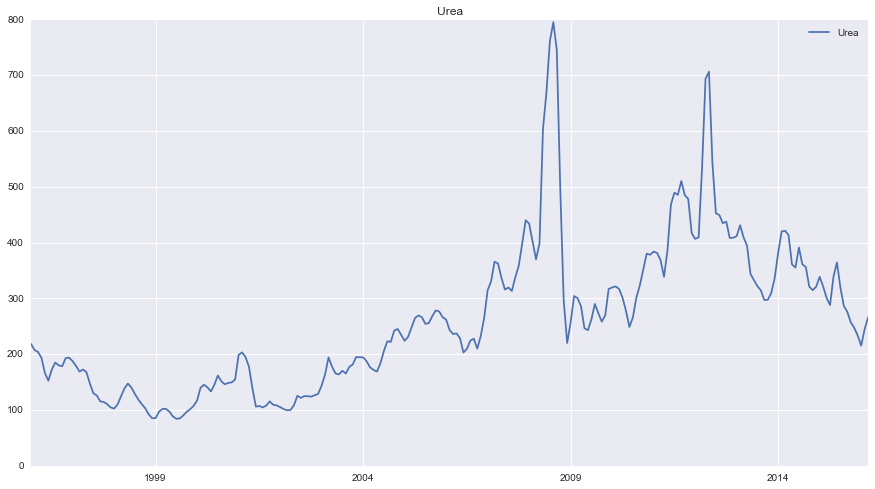

In [7]:
df.plot(title='Urea',figsize=(15,8))

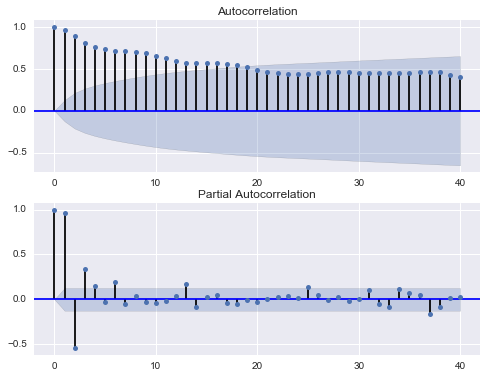

In [14]:
#looks like nonseasonal arima model
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(df,lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(df,lags=40,ax=ax2)

In [17]:
#Dickey-Fuller test
sm.tsa.stattools.adfuller(df)[:2]

ValueError: too many values to unpack (expected 2)

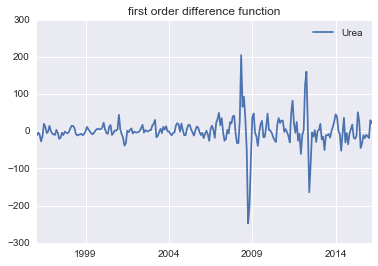

In [18]:
y_diff1 = df.diff(1)[1:]
y_diff1.plot()
plt.title('first order difference function')

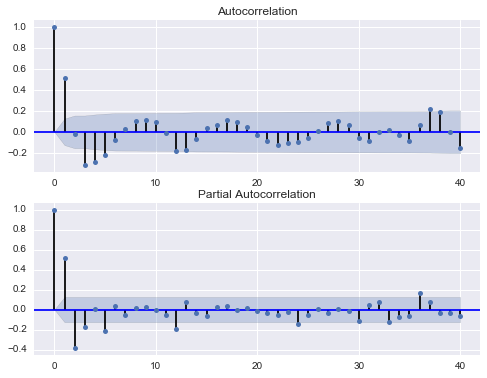

In [19]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(y_diff1,lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(y_diff1,lags=40,ax=ax2)

In [21]:
#dickey fuller test
print (sm.tsa.stattools.adfuller(y_diff1)[:2]);
y_diff2 = y_diff1.diff(1)[1:]
print (sm.tsa.stattools.adfuller(y_diff2)[:2])

ValueError: too many values to unpack (expected 2)

In [22]:
from statsmodels.tsa.arima_model import ARIMA
arima100 = ARIMA(df,(1,0,0),freq='Q').fit()
arima110= ARIMA(df,[1,1,0],freq='Q').fit()
print (arima100.summary())
print ("\n")
print (arima110.summary())

                              ARMA Model Results                              
Dep. Variable:                   Urea   No. Observations:                  243
Model:                     ARMA(1, 0)   Log Likelihood               -1220.734
Method:                       css-mle   S.D. of innovations             36.578
Date:                Wed, 27 Apr 2016   AIC                           2447.468
Time:                        12:49:19   BIC                           2457.947
Sample:                    01-31-1996   HQIC                          2451.689
                         - 03-31-2016                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        257.2083     52.631      4.887      0.000       154.054   360.362
ar.L1.Urea     0.9592      0.017     57.622      0.000         0.927     0.992
                                    Roots           

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


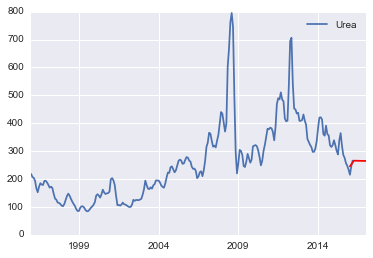

In [23]:
predict_100 = arima100.predict('2016-03-31','2017-03-31')
df.plot()
predict_100.plot(color='red')

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


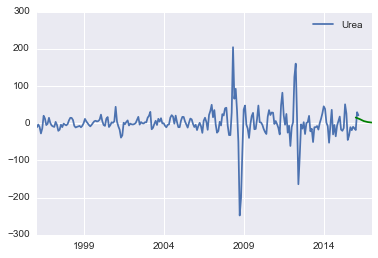

In [24]:
# dates[-5:]
predict_diff1 = arima110.predict('2016-03-31','2017-03-31') # predict 1st difference result
# ydata.plot()

y_diff1.plot()
predict_diff1.plot(color = 'green')

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


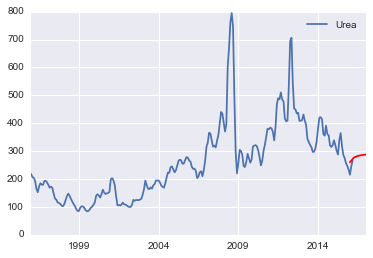

In [25]:
predict_ppi = arima110.predict('2016-03-31','2017-03-31',typ='levels')
df.plot()
predict_ppi.plot(color='red')


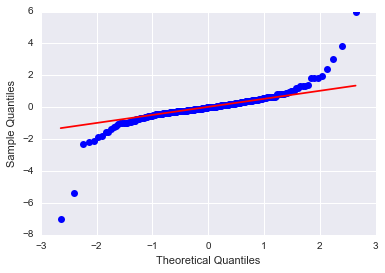

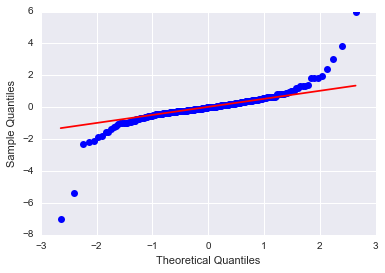

In [31]:
from statsmodels.graphics.api import qqplot
resid = arima110.resid
qqplot(resid,line='q',fit=True)

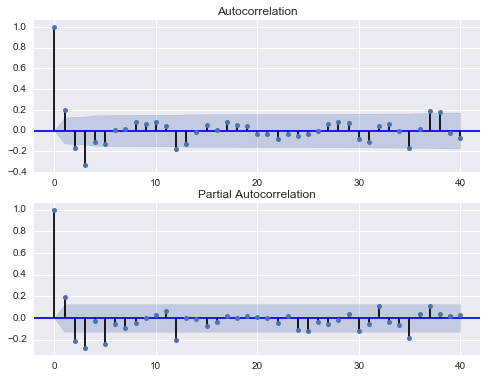

In [32]:
fig = plt.figure(figsize=(8,6))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(resid,lags=40,ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid,lags=40,ax=ax2)

In [41]:
#http://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

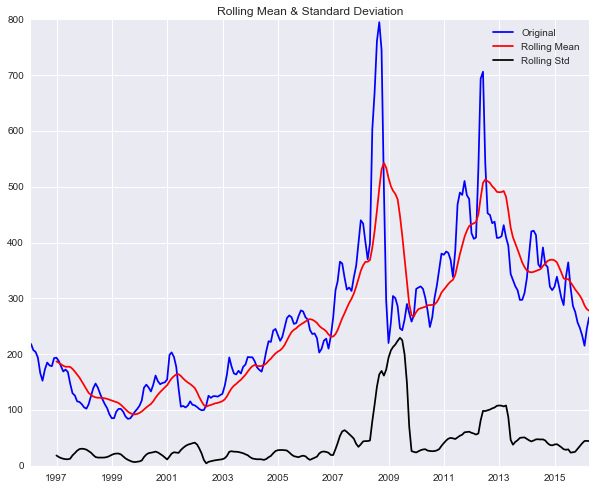

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [42]:
test_stationarity(df)

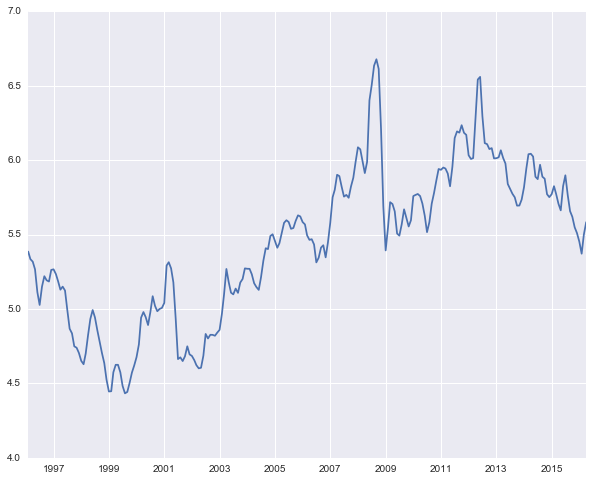

In [43]:
df_log = np.log(df)
plt.plot(df_log)

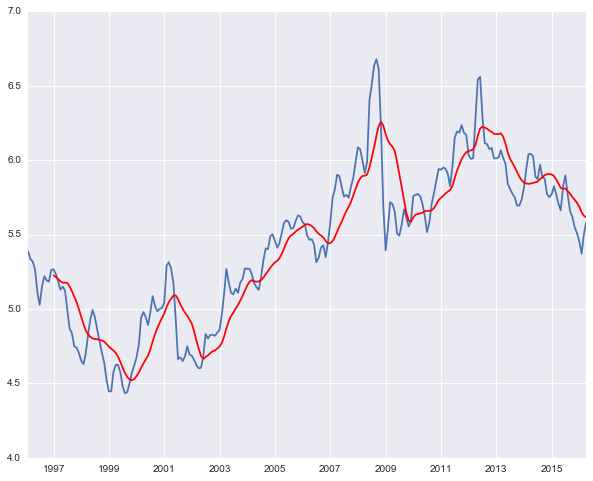

In [45]:
#average over past year (last 12 values)
moving_avg = pd.rolling_mean(df_log,12)
plt.plot(df_log)
plt.plot(moving_avg, color='red')

In [46]:
df_log_moving_avg_diff = df_log - moving_avg
df_log_moving_avg_diff.head(12)

,Urea
1996-01-31,NaN
1996-02-29,NaN
1996-03-31,NaN
1996-04-30,NaN
1996-05-31,NaN
1996-06-30,NaN
1996-07-31,NaN
1996-08-31,NaN
1996-09-30,NaN
1996-10-31,NaN


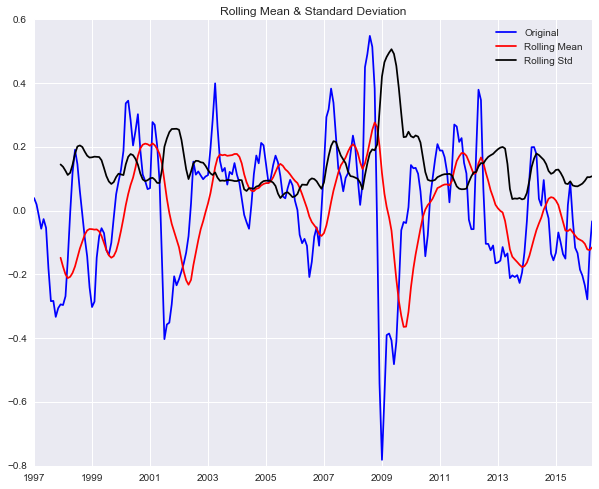

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [47]:
df_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(df_log_moving_avg_diff)

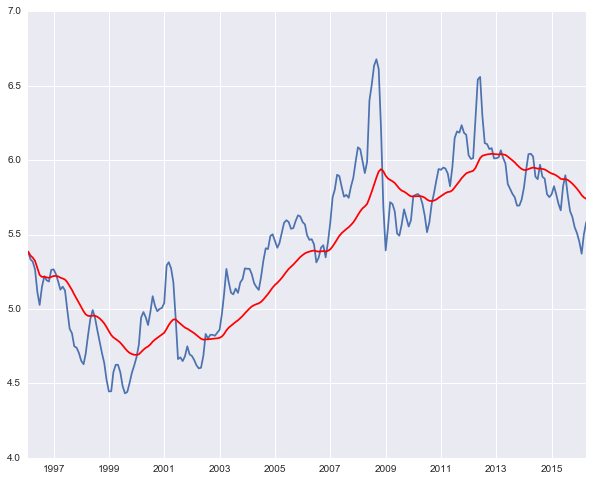

In [48]:
expwighted_avg = pd.ewma(df_log, halflife=12)
plt.plot(df_log)
plt.plot(expwighted_avg, color='red')

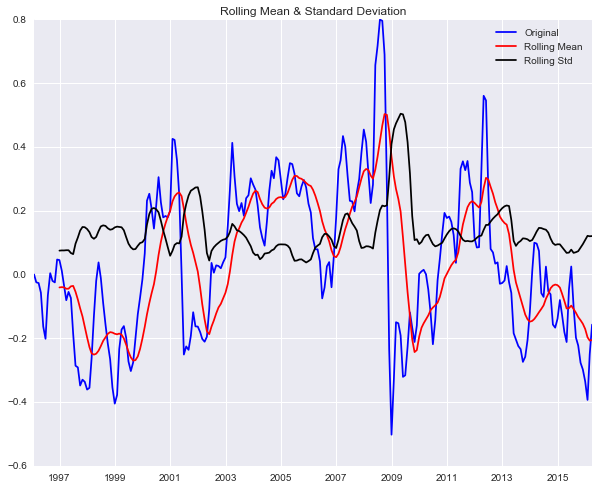

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [49]:
df_log_ewma_diff = df_log - expwighted_avg
test_stationarity(df_log_ewma_diff)

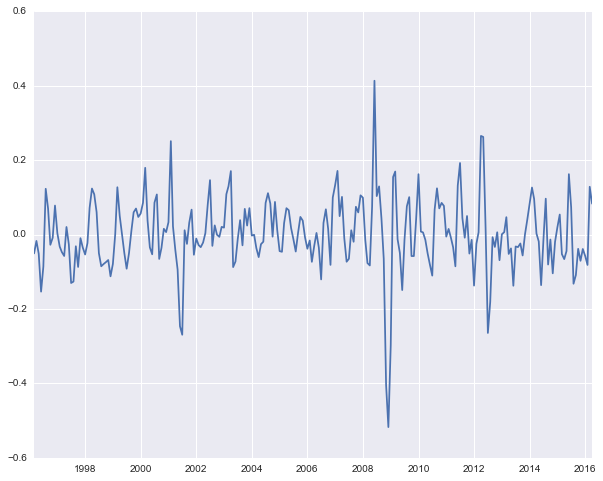

In [50]:
df_log_diff = df_log - df_log.shift()
plt.plot(df_log_diff)

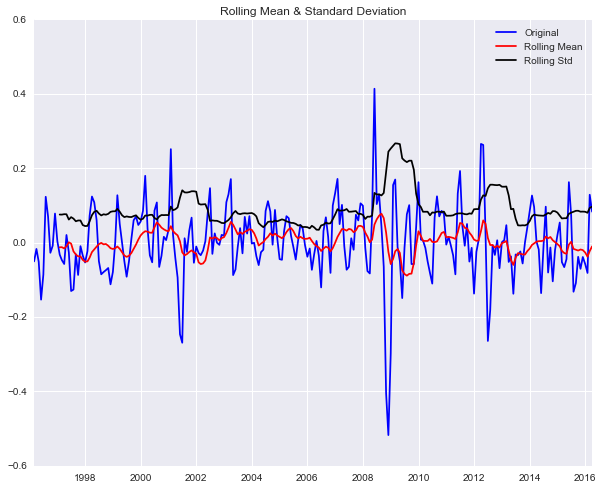

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [51]:
df_log_diff.dropna(inplace=True)
test_stationarity(df_log_diff)

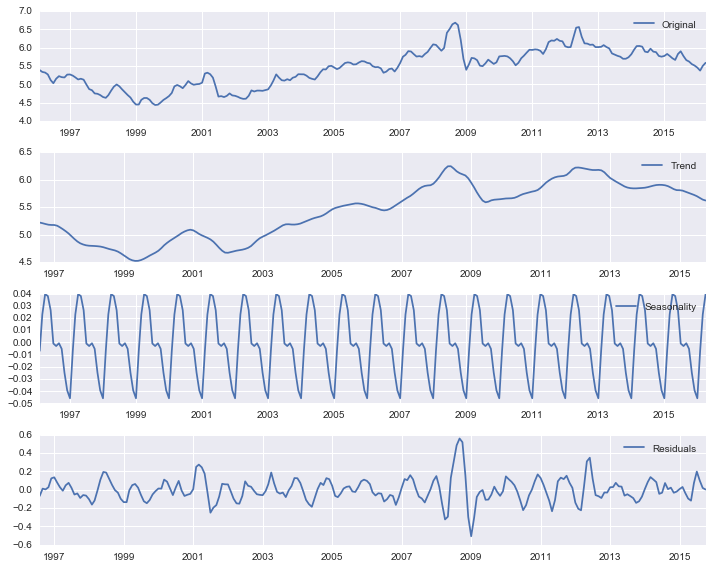

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

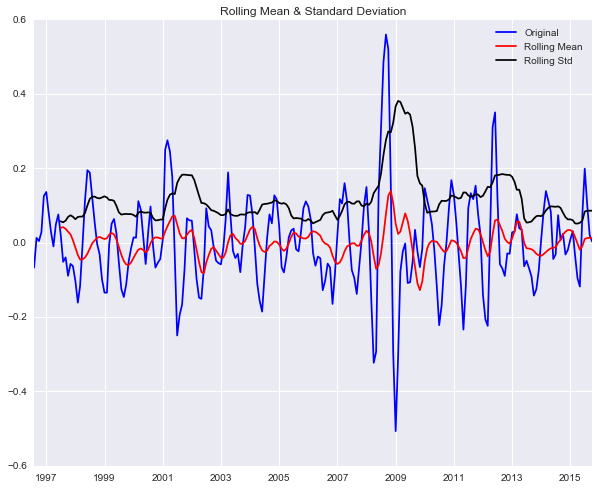

Results of Dickey-Fuller Test:


ValueError: too many values to unpack (expected 2)

In [53]:
df_log_decompose = residual
df_log_decompose.dropna(inplace=True)
test_stationarity(df_log_decompose)

In [54]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20, method='ols')

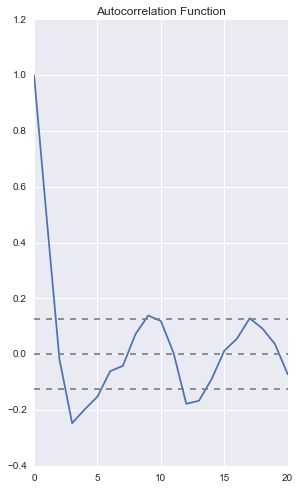

In [55]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

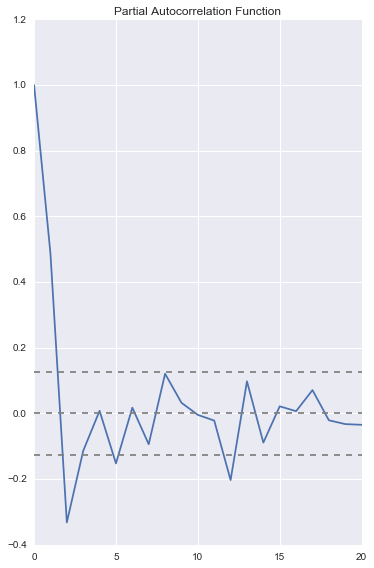

In [56]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

ValueError: Cannot add integral value to Timestamp without offset.

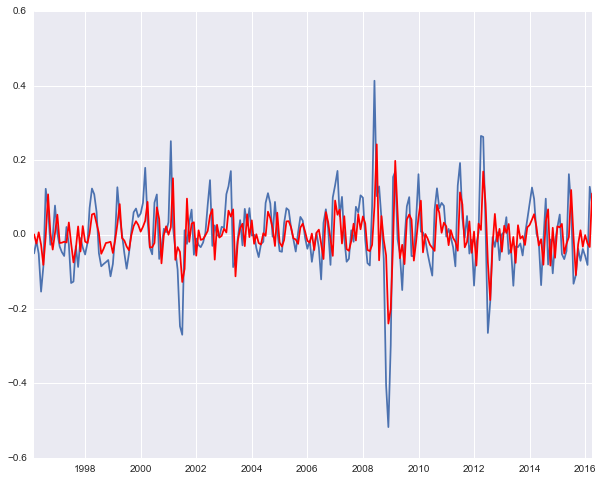

In [58]:
#ar model
model = ARIMA(df_log, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-df_log_diff)**2))

ValueError: Cannot add integral value to Timestamp without offset.

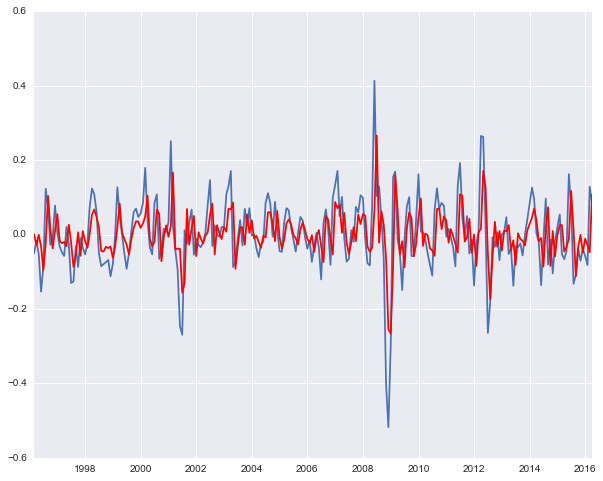

In [59]:
#ma model
model = ARIMA(df_log, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-df_log_diff)**2))

ValueError: Cannot add integral value to Timestamp without offset.

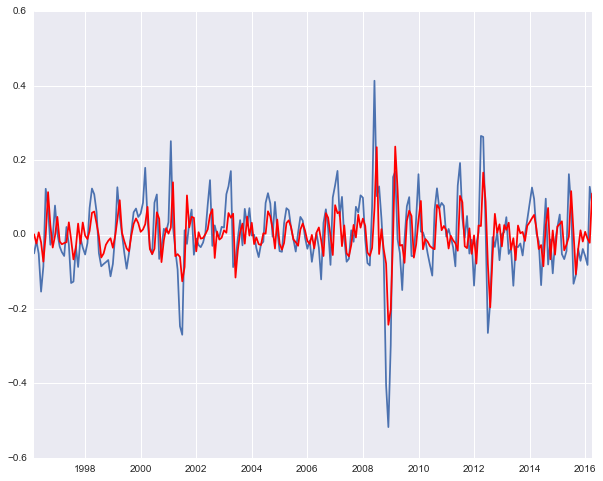

In [60]:
#combined model
model = ARIMA(df_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(df_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-df_log_diff)**2))

In [61]:
# back to original scale
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

1996-02-29    0.000866
1996-03-31   -0.024051
1996-04-30    0.006065
1996-05-31   -0.020744
1996-06-30   -0.072645
dtype: float64


In [62]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

1996-02-29    0.000866
1996-03-31   -0.023185
1996-04-30   -0.017120
1996-05-31   -0.037864
1996-06-30   -0.110509
dtype: float64


In [63]:
predictions_ARIMA_log = pd.Series(df_log.ix[0], index=df_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

1996-01-31         NaN
1996-02-29    0.000866
1996-03-31   -0.023185
1996-04-30   -0.017120
1996-05-31   -0.037864
dtype: float64

ValueError: Cannot add integral value to Timestamp without offset.

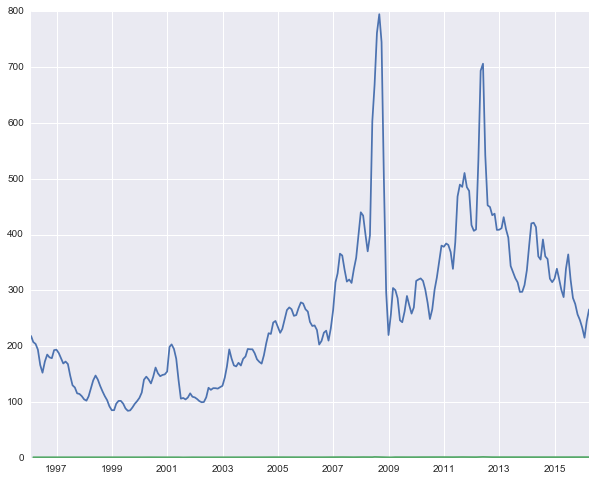

In [64]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

In [33]:
#tests from datasets
from statsmodels.datasets.macrodata import load_pandas

### Holt winters

In [34]:
import numpy as np
import csv
import matplotlib.pylab as plt
from IPython.core.pylabtools import figsize
from collections import OrderedDict
from scipy.stats import linregress
from scipy.optimize import differential_evolution

figsize(10, 8)

In [35]:
class HoltWinters(object):
    """Holt-Winters algorithm for forecasting time series"""
    
    def __init__(self, ts_dir, window, init_fit_first_n=None):
        """
        Initialize parameters used in Holt-Winters.
        
            ts_dr (str): String name of csv file containing time series data.
            window (int): Length of seasonality. Used in determining seed values for 
                Holt-Winters algorithm.
            trend_fit_first_n (int): The number of data points from the de-seasonalized 
                data for which to fit a line to in order to get the initial trend and 
                level values.
        """
        
        self.ts_dir = ts_dir
        self.read_ts_csv()
        self.window = window
        self.init_fit_first_n = init_fit_first_n
    
    def read_ts_csv(self):
        """
        Read in time-series from a csv. Result is stored in an ordered dict.
        """
        
        ts = OrderedDict()
        with open(self.ts_dir, "rb") as csv_file:
            lines = csv.reader(csv_file)
            # skip header
            lines.next()
            for line in lines:
                ts[int(line[0])] = float(line[1])
        
        self.ts = ts
        self.n = len(ts)
    
    @staticmethod
    def moving_average(ts, window):
        """
        Fits a moving average to a time series.
        
            ts (Ordered Dict): An ordered dictionary of time series data where the keys 
                are integers representing date and the values are corresponding time-series
                metrics.
            window (int): Length of moving average. If *window* is even, a 2-by-*window*
                moving average is calculated. Entries where a moving average cannot be 
                calculated due to window size are set to 0.
        """
        
        ma = np.zeros(len(ts))
        weights = np.repeat(1.0, window)/window

        if window%2 == 0:
            # window is even
            ma1 = np.convolve(ts[:-1], weights, 'valid')
            ma2 = np.convolve(ts[1:], weights, 'valid')
            ma[window/2:-window/2] = 0.5*(ma1 + ma2)
        else:
            # window is odd
            ma[(window - 1)/2:-(window - 1)/2] = np.convolve(ts, weights, 'valid')

        return (ma)
    
    def get_initial_vals(self, init_plot=False):
        """
        Gets initial level, trend, and seasonality adjustments for Holt-Winters. 
        A window unit moving average is fit to the data to achieve this.
        
           init_plot (binary): Whether or not to plot time series related to initialization
                of Holt-Winters. Namely, the de-season and moving average time series.
        """
        
        ts = self.ts
        init_fit_first_n = self.init_fit_first_n
        window = self.window
        season_adj_factor = {}
        ts_vals = np.asarray(ts.values())
        ts_keys = np.asarray(ts.keys())

        ma = self.moving_average(ts_vals, window)

        if window%2 == 0:
            ix_bound = window/2    
        else:
            ix_bound = (window - 1)/2

        # Calculate seasonal adjustment factors
        season_adj_factor_vals = ts_vals[ix_bound:-ix_bound]/ma[ix_bound:-ix_bound]
        for date_ix, season_adj_factor_val in zip(ts_keys[ix_bound:-ix_bound], season_adj_factor_vals):
            try:
                season_adj_factor[date_ix%window].append(season_adj_factor_val)
            except KeyError:
                season_adj_factor[date_ix%window] = [season_adj_factor_val]

        for key, val in season_adj_factor.iteritems():
            season_adj_factor[key] = np.mean(val)

        # Create de-seasonalized data to calculate initial trend and level
        deseason_ts = [val/season_adj_factor[key%window] for key, val in ts.iteritems()]

        trend_0, level_0, _, _, _ = linregress(ts_keys[:init_fit_first_n], 
                                               deseason_ts[:init_fit_first_n])

        if init_plot:
            plt.plot(ts_keys, deseason_ts, '--k', label="de-seasonalized")
            plt.plot(ts_keys, ts_vals, '-k', label="raw")
            plt.plot(ts_keys, ma, '*k', label="moving avg")
            plt.legend(loc="best")
            plt.xlabel("Date Index")
            plt.ylabel("Metric")
            plt.show()

        return (level_0, trend_0, season_adj_factor)
    
    @staticmethod
    def _update_forecast_onestep(level, trend, season_adj_factor):
        return ((level + trend)*season_adj_factor)
    
    @staticmethod
    def _update_level(level, trend, alpha, forecast_error, season_adj_factor):
        return (level + trend + alpha*forecast_error/season_adj_factor)
    
    @staticmethod
    def _update_trend(trend, alpha, gamma, forecast_error, season_adj_factor):
        return (trend + gamma*alpha*forecast_error/season_adj_factor)
        
    @staticmethod
    def _update_season_adj_factor(level, trend, alpha, delta, forecast_error, season_adj_factor):
        return (season_adj_factor + delta*(1.0 - alpha)*forecast_error/(level + trend))
    
    def holt_winters(self, alpha, gamma, delta, save_params=False):
        """
        Applies the Holt-Winters algorithm to generate a time series forecast. 
        """
        
        n = self.n
        window = self.window
        forecast_one_step = np.zeros(n)
        forecast_error = np.zeros(n)

        # Initialize Holt-Winters iteration variables
        level_0, trend_0, season_adj_factors = self.get_initial_vals()
        level, trend = level_0, trend_0

        for i, (date_ix, metric) in enumerate(self.ts.iteritems()):
            season_ix = date_ix%window
            season_adj_factor = season_adj_factors[season_ix]
            forecast_one_step[i] = self._update_forecast_onestep(level_0, trend_0, season_adj_factor)
            forecast_error[i] = metric - forecast_one_step[i]
            level = self._update_level(level_0, trend_0, alpha, forecast_error[i], season_adj_factor)
            trend = self._update_trend(trend_0, alpha, gamma, forecast_error[i], season_adj_factor)
            season_adj_factors[season_ix] = self._update_season_adj_factor(level_0, trend_0, 
                                                                           alpha, delta, 
                                                                           forecast_error[i], 
                                                                           season_adj_factor)

            level_0 = level
            trend_0 = trend

        standard_error = np.sqrt(np.sum(forecast_error**2)/(n - 3.0))
        
        if save_params:
            self._level_opt = level
            self._trend_opt = trend
            self._alpha_opt = alpha
            self._gamma_opt = gamma
            self._delta_opt = delta
            self._season_adj_factors_opt = season_adj_factors
            self._standard_error = standard_error

        return (forecast_one_step, forecast_error, standard_error)
    
    def fit_holt_winters(self):
        """
        Uses an evolutionary algorithm to identify the alpha, gamma, delta
        parameters that minimize the standard error in Holt-Winters fit.
        """
        
        opt_dummy = lambda x: self.holt_winters(*x)[2]
        opt_res = differential_evolution(opt_dummy, bounds=[[0., 1.]]*3)
 
        assert opt_res["success"] == True, "Optimization failed"
        self.holt_winters(*opt_res["x"], save_params=True)
    
    def holt_winters_best_fit(self):
        """
        Determines Holt-Winters forecast corresponding to alpha, gamma and
        delta values that minimize the standard error. 
        """
        
        forecast_one_step, forecast_error, _ = self.holt_winters(self._alpha_opt, 
                                                                 self._gamma_opt,
                                                                 self._delta_opt)
        return (forecast_one_step, forecast_error)
        
    def predict(self, forecast_n_steps, n_sims):
        """
        Forecast metric value for future times.
        
            forecast_n_steps (int): Number of time-steps for which a forecast is desired.
            n_sims (int): Number of simulations to perform of the forecast such that
                95% confidence bounds can be applied to the forecast.
        """
        
        metric_forecast = np.zeros([forecast_n_steps, n_sims])

        # perform n_sims number of simulations for future demand
        for n_sim in xrange(n_sims):
            # reset relevant variables    
            alpha = self._alpha_opt
            gamma = self._gamma_opt
            delta = self._delta_opt
            level = self._level_opt
            trend = self._trend_opt
            season_adj_factors = self._season_adj_factors_opt
            standard_error = self._standard_error
            window = self.window
            n = self.n
            level_0, trend_0 = level, trend
            
            forecast_error = np.zeros(forecast_n_steps)
            forecast_one_step = np.zeros(forecast_n_steps)
            for i, date_ix in enumerate(xrange(n + 1, n + forecast_n_steps + 1)):
                season_ix = date_ix%window
                season_adj_factor = season_adj_factors[season_ix]
                forecast_error[i] = np.random.normal(scale=standard_error)
                forecast_one_step[i] = self._update_forecast_onestep(level_0, trend_0, season_adj_factor)
                level = self._update_level(level_0, trend_0, alpha, forecast_error[i], season_adj_factor)
                trend = self._update_trend(trend_0, alpha, gamma, forecast_error[i], season_adj_factor)
                season_adj_factors[season_ix] = self._update_season_adj_factor(level_0, trend_0, 
                                                                               alpha, gamma, 
                                                                               forecast_error[i], 
                                                                               season_adj_factor)
                level_0 = level
                trend_0 = trend

            metric_forecast[:, n_sim] = forecast_one_step + forecast_error

        metric_mean = np.mean(metric_forecast, axis=1)
        metric_lb, metric_ub = np.percentile(metric_forecast, q=[2.5, 97.5], axis=1)

        return (metric_mean, metric_lb, metric_ub)
    
    def plot_correlogram(self, forecast_error):
        """
        Plots the correlogram for a given forecast.
        
            forecast_error (numpy array): Forecast error for Holt-Winters
        """
        
        # Autocorrelation
        error_mean_delta = forecast_error - np.mean(forecast_error)
        total_error = np.dot(error_mean_delta, error_mean_delta)
        lags = np.zeros(self.window)
        
        for i in xrange(1, self.window + 1):
            lags[i-1] = np.dot(error_mean_delta[i:], error_mean_delta[:-i])/total_error

        plt.vlines(range(1, self.window + 1), 0, lags)   
        plt.hlines(0, 0, self.window + 2)

        # Significance level for autocorrelation
        ac_bound = 2./np.sqrt(self.n)
        plt.hlines(ac_bound, 0, self.window + 2, color="k", linestyles="dashed")
        plt.hlines(-ac_bound, 0, self.window + 2, color="k", linestyles="dashed")
        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")
        plt.title("Correlogram for Forecast Error")
        plt.show();

In [38]:
hw = HoltWinters("C:/Users/msteinme/Documents/simple.csv", window=12)
hw.fit_holt_winters()

forecast_one_step, forecast_error = hw.holt_winters_best_fit()
future_mean, future_lb, future_ub = hw.predict(forecast_n_steps=12, n_sims=500)

# Plot correlogram
hw.plot_correlogram(forecast_error)

# Plot forecast
plt.plot(hw.ts.keys(), hw.ts.values(), "-k", label="raw")
plt.plot(hw.ts.keys(), forecast_one_step, "--k", label="holt-winters")

x_future_min = max(hw.ts.keys()) + 1
x_future = range(x_future_min, x_future_min + len(future_mean))
plt.plot(x_future, future_mean, color='green', label="95% CI")
plt.fill_between(x_future, future_ub, future_lb, color="green", alpha=0.3)
plt.legend(loc="best")
plt.xlabel("Date Index")
plt.ylabel("Metric");

AttributeError: '_csv.reader' object has no attribute 'next'

## Different Models listed at beginning like ARMA Monthly Imports ipynb

In [8]:
from __future__ import print_function
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima_model import ARMAResults

In [9]:
# DW statistic, value near 2 indicates no first order serial correlation
# positive correlation = DW below 2 and negative = DW above 3
sm.stats.durbin_watson(df)
#strong evidence that the variable has high autocorrelation
#positive autocorrelation, look at AR term not MA, if negative look at MA

array([ 0.01586823])

In [26]:
#arima (0,0,0)
def plot_corr(df,lags):
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df, lags=lags, ax=ax1)
    # partial autocorrelation
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df, lags=lags, ax=ax2)
    fig.show()

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


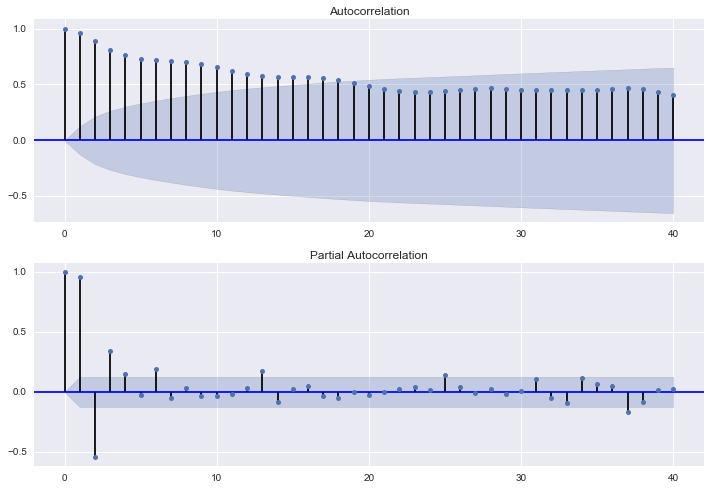

In [27]:
#40 lags
plot_corr(df,40)
#2-3 spikes in PACF meaning that all other higher autocorrelations explained by lag 2-3 autocorrelation

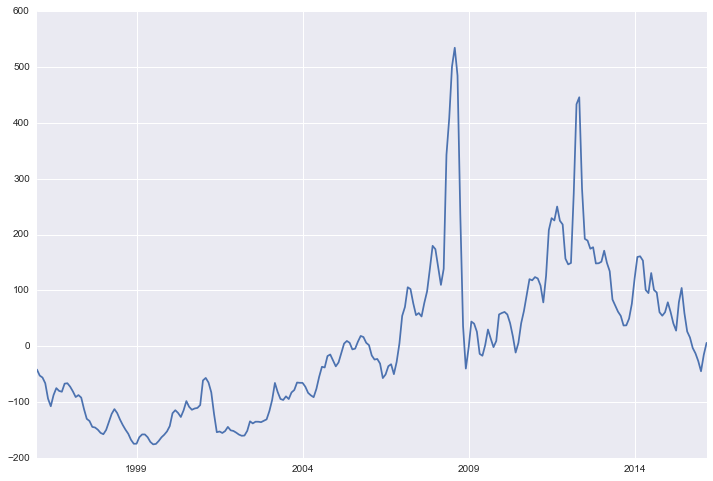

In [29]:
arima_mod000 = sm.tsa.ARIMA(df, (0,0,0)).fit()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_mod000.resid.plot(ax=ax);

In [30]:
resid000 = arima_mod000.resid
stats.normaltest(resid000)

NormaltestResult(statistic=53.435214100179635, pvalue=2.4928186690091661e-12)

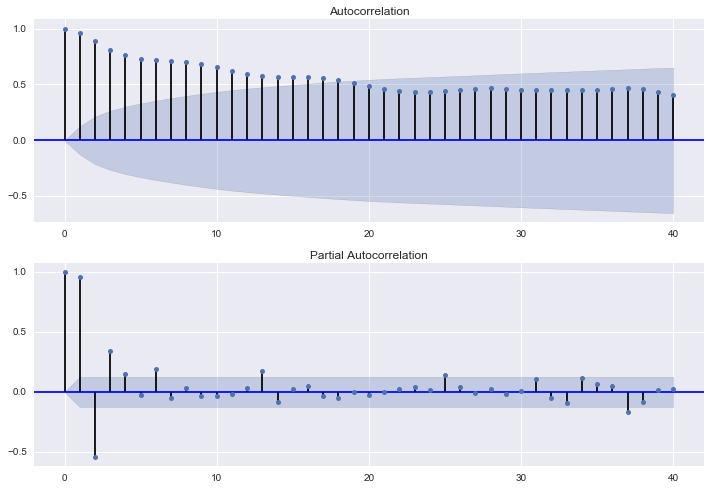

In [31]:
#now look autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid000.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid000, lags=40, ax=ax2)

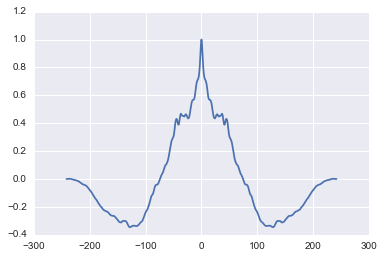

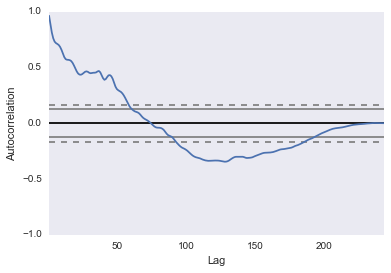

In [12]:
#autocorrelation_plot
from pandas.tools.plotting import autocorrelation_plot
# show plots in the notebook
%matplotlib inline
df['Urea_2'] = df['Urea']
df['Urea_2'] = (df['Urea_2'] - df['Urea_2'].mean()) / (df['Urea_2'].std())
plt.acorr(df['Urea_2'],maxlags = len(df['Urea_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(df['Urea'])
plt.show()
#the autocorrelation plot should be near 0 for randomness, randomness assumption fails in earlier lags and from 100-175ish

In [11]:
#since perhaps autocorrelations at lags 3 and above are from autocorrelation at 2
#look at seasonal difference of 2
arima_mod020 = sm.tsa.ARIMA(df, (0,2,0)).fit()

In [12]:
resid020 = arima_mod020.resid
stats.normaltest(resid020)

NormaltestResult(statistic=70.65519279147172, pvalue=4.5438064785690915e-16)

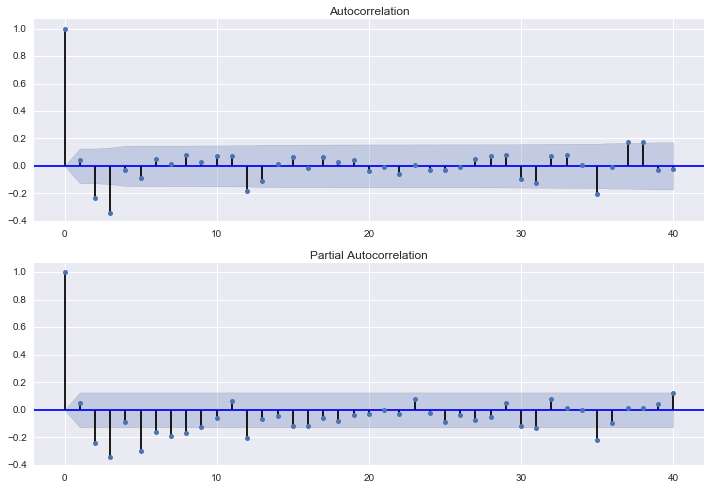

In [13]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid020.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid020, lags=40, ax=ax2)

In [14]:
arima_mod120 = sm.tsa.ARIMA(df, (1,2,0)).fit()

In [16]:
resid120 = arima_mod120.resid
stats.normaltest(resid120)

NormaltestResult(statistic=68.952088891542829, pvalue=1.0647413961286949e-15)

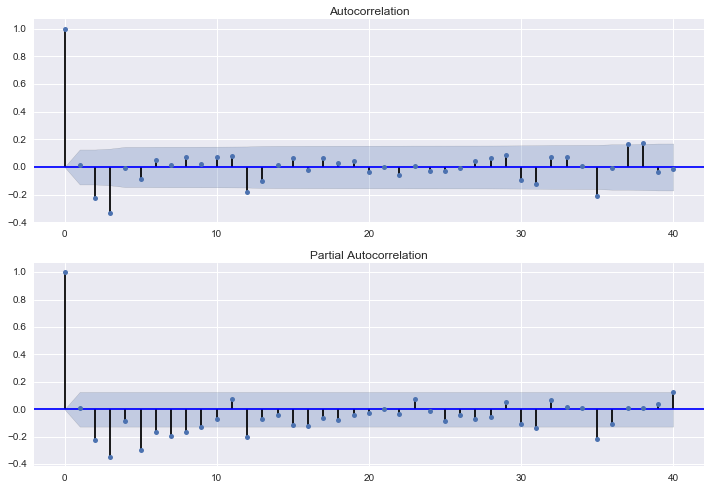

In [17]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid120.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid120, lags=40, ax=ax2)

In [18]:
arima_mod210 = sm.tsa.ARIMA(df, (2,1,0)).fit()

In [19]:
resid210 = arima_mod210.resid
stats.normaltest(resid210)

NormaltestResult(statistic=69.465290799680702, pvalue=8.2376580646085142e-16)

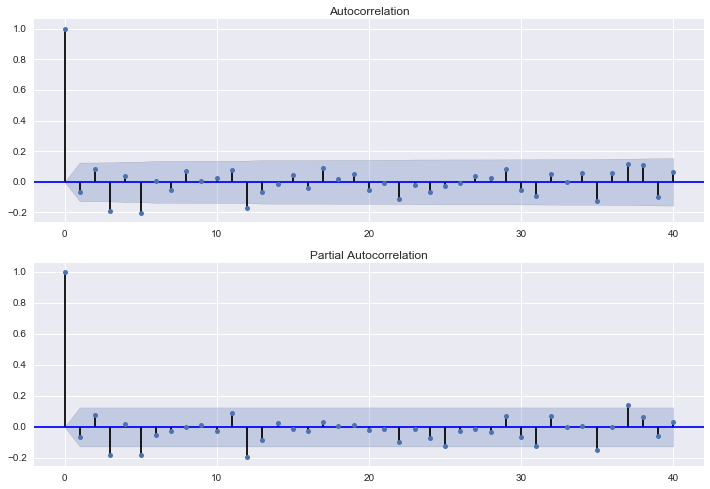

In [20]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid210.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid210, lags=40, ax=ax2)

In [22]:
sm.stats.durbin_watson(arima_mod210.resid.values)

2.1253346362629424

In [23]:
arima_mod220 = sm.tsa.ARIMA(df, (2,2,0)).fit()

In [24]:
resid220 = arima_mod220.resid
stats.normaltest(resid220)

NormaltestResult(statistic=73.655262486731971, pvalue=1.0138249372345862e-16)

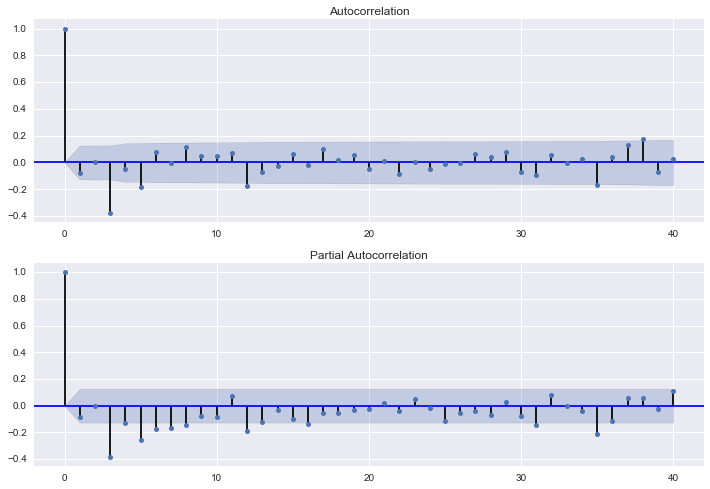

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid220.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid220, lags=40, ax=ax2)

#### A nonseasonal ARIMA model is classified as an ARIMA(p,d,q) model, where:
#### •p is the number of autoregressive terms,
#### •d is the number of nonseasonal differences needed for stationarity, and
#### •q is the number of lagged forecast errors in the prediction equation

### Model 1  ARIMA(2,0) 

In [20]:
arma_mod20 = sm.tsa.ARMA(df, (2,0)).fit()
print(arma_mod20.params)

const         260.305216
ar.L1.Urea      1.479267
ar.L2.Urea     -0.538514
dtype: float64


In [21]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2365.5461544753434 2379.51840025 2371.1740404


In [22]:
sm.stats.durbin_watson(arma_mod20.resid.values)
#shows possible autocorrelation since value not near 2

1.6096290207044948

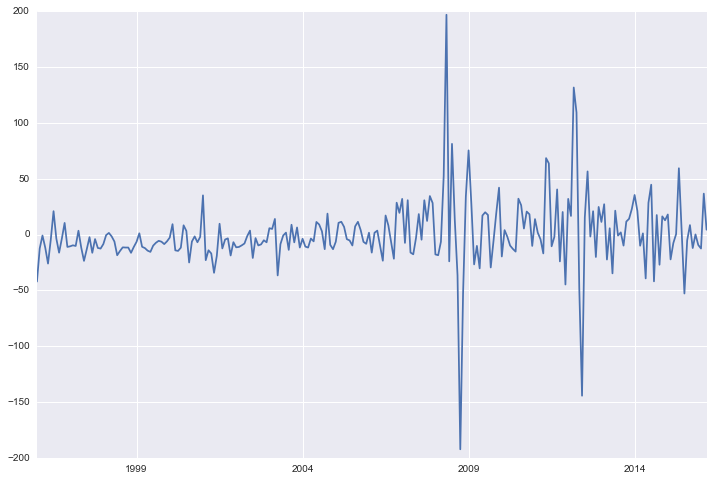

In [23]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax);

In [24]:
# looks at residuals and nornal plot, want normal distribution
resid20 = arma_mod20.resid
stats.normaltest(resid20)
#nice p-value

NormaltestResult(statistic=74.486138400902945, pvalue=6.6917630894773561e-17)

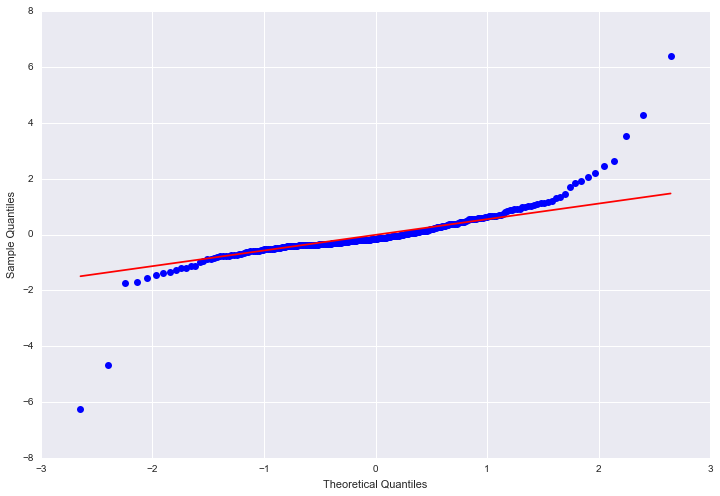

In [26]:
#qq plot, has a big tails
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

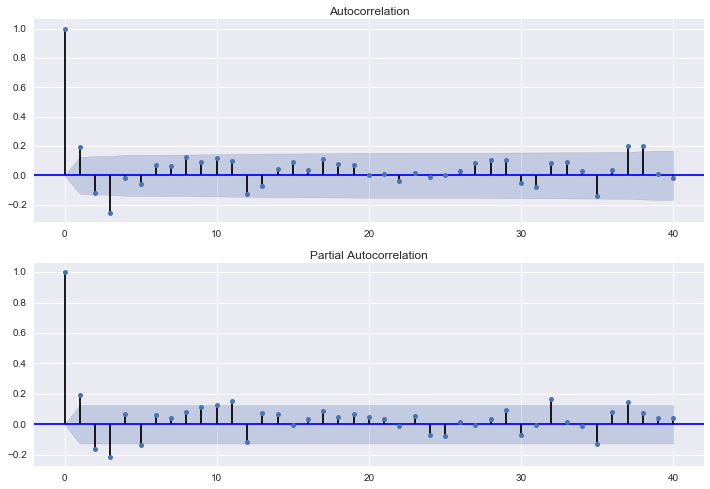

In [27]:
#now look autocorrelation
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [28]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))
#p-values well below 0.05 so no indication of significance

           AC           Q      Prob(>Q)
lag                                    
1    0.191324    9.005242  2.692063e-03
2   -0.122118   12.689215  1.756191e-03
3   -0.257284   29.109716  2.123643e-06
4   -0.015216   29.167385  7.228582e-06
5   -0.056450   29.964497  1.498780e-05
6    0.068876   31.156168  2.366683e-05
7    0.064512   32.206038  3.719466e-05
8    0.125071   36.168950  1.635265e-05
9    0.090798   38.266482  1.561319e-05
10   0.115379   41.667959  8.590458e-06
11   0.098241   44.144664  6.855385e-06
12  -0.125815   48.224355  2.856784e-06
13  -0.072833   49.597468  3.494765e-06
14   0.040107   50.015662  6.069527e-06
15   0.093576   52.302128  5.034292e-06
16   0.038211   52.685061  8.487200e-06
17   0.108784   55.802447  5.089669e-06
18   0.077603   57.395909  5.354105e-06
19   0.073457   58.830028  5.917120e-06
20   0.003144   58.832666  1.077871e-05
21   0.011989   58.871214  1.889840e-05
22  -0.036943   59.238866  2.894323e-05
23   0.015464   59.303578  4.814181e-05


In [30]:
# compute predictions and analyze fit against actual values
predict_urea20 = arma_mod20.predict('2009-03-31', '2016-03-31', dynamic=True)
print (predict_urea20)

2009-03-31    327.198879
2009-04-30    335.593897
2009-05-31    335.654073
2009-06-30    331.222252
2009-07-31    324.634003
2009-08-31    317.274823
2009-09-30    309.936498
2009-10-31    303.044181
2009-11-30    296.800398
2009-12-31    291.275787
2010-01-31    286.465780
2010-02-28    282.325577
2010-03-31    278.791370
2010-04-30    275.792892
2010-05-31    273.260565
2010-06-30    271.129300
2010-07-31    269.340284
2010-08-31    267.841570
2010-09-30    266.587981
2010-10-31    265.540669
2010-11-30    264.666489
2010-12-31    263.937337
2011-01-31    263.329484
2011-02-28    262.822967
2011-03-31    262.401030
2011-04-30    262.049639
2011-05-31    261.757058
2011-06-30    261.513481
2011-07-31    261.310724
2011-08-31    261.141964
                 ...    
2013-10-31    260.312244
2013-11-30    260.311064
2013-12-31    260.310082
2014-01-31    260.309265
2014-02-28    260.308585
2014-03-31    260.308019
2014-04-30    260.307548
2014-05-31    260.307157
2014-06-30    260.306831


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


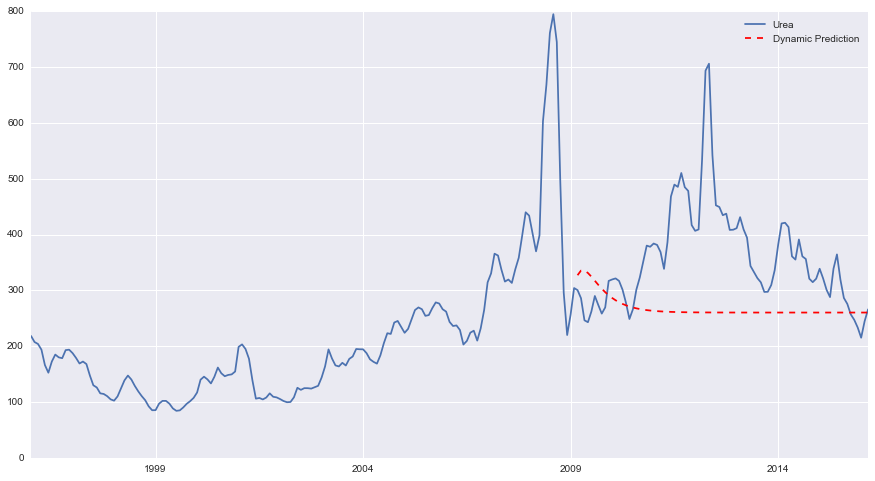

In [32]:
ax = df.ix['1996-01-31':].plot(figsize=(15,8))
ax = predict_urea20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend(); #looks like crap

In [33]:
#calculate the forecast errors
def mean_forecast_err(y,yhat):
    return y.sub(yhat).mean()

In [34]:
def mean_absolute_err(y,yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat)) # or percent error =*100 

In [35]:
print ("MFE = ", mean_forecast_err(df['Urea'], predict_urea20))
print ("MAE = ", mean_absolute_err(df['Urea'], predict_urea20))
#MFE large model underforecasts

MFE =  90.24206425200329
MAE =  0.33705775990895326


### Model 2 ARMA(3,0)
#### 3 autoregressive terms, no moving average

In [36]:
arma_mod30 = sm.tsa.ARMA(df, (3,0)).fit()

In [37]:
print(arma_mod30.params)

const         258.203685
ar.L1.Urea      1.665059
ar.L2.Urea     -1.045991
ar.L3.Urea      0.340929
dtype: float64


In [38]:
print(arma_mod30.aic,arma_mod30.bic,arma_mod30.hqic)

2337.239831246713 2354.70513846 2344.27468865


In [39]:
##shows no autocorrelation since value near 2
sm.stats.durbin_watson(arma_mod30.resid.values)

2.0754000039122356

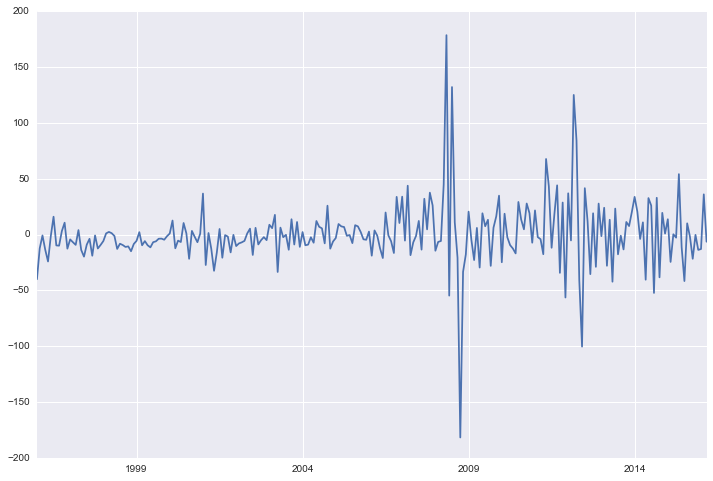

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod30.resid.plot(ax=ax);

In [41]:
resid30 = arma_mod30.resid
stats.normaltest(resid30)

NormaltestResult(statistic=81.020501236925256, pvalue=2.5504786703835591e-18)

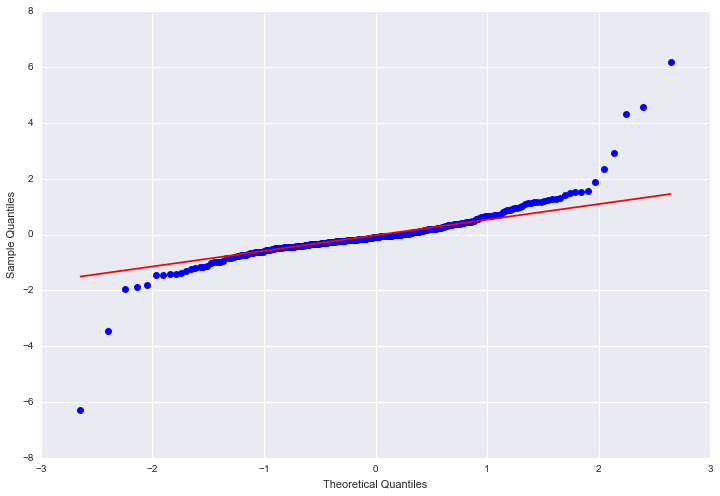

In [42]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid30, line='q', ax=ax, fit=True)
#still tail

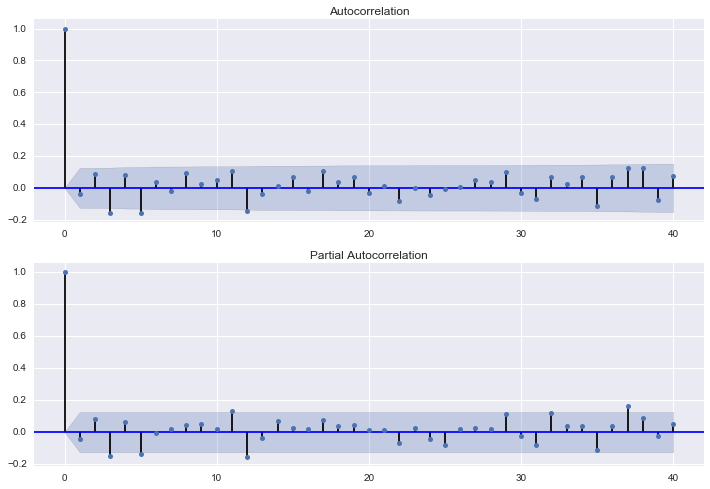

In [46]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid30.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid30, lags=40, ax=ax2)

In [47]:
r,q,p = sm.tsa.acf(resid30.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))
#p-value significant in first 2 lags

           AC          Q  Prob(>Q)
lag                               
1   -0.041718   0.428163  0.512892
2    0.085271   2.224376  0.328839
3   -0.157549   8.381698  0.038748
4    0.078910   9.932788  0.041575
5   -0.158629  16.227281  0.006224
6    0.035251  16.539432  0.011134
7   -0.020726  16.647798  0.019814
8    0.093573  18.866026  0.015593
9    0.024364  19.017049  0.025048
10   0.049212  19.635856  0.032891
11   0.103227  22.370289  0.021656
12  -0.142698  27.618335  0.006289
13  -0.041029  28.054080  0.008894
14   0.011503  28.088479  0.013848
15   0.066328  29.237261  0.014989
16  -0.016767  29.310993  0.021922
17   0.107939  32.380147  0.013492
18   0.035070  32.705580  0.018113
19   0.066968  33.897527  0.018896
20  -0.031060  34.155075  0.025095
21   0.014534  34.211727  0.034392
22  -0.085158  36.165283  0.029150
23   0.000887  36.165496  0.039676
24  -0.045722  36.733796  0.046509
25  -0.010097  36.761636  0.060812
26   0.004867  36.768134  0.078421
27   0.049775  37.45

In [50]:
#in sample dynamic prediction how does our model do
predict_urea30 = arma_mod30.predict('2009-03-31','2016-03-31',dynamic=True)
print(predict_urea30)

2009-03-31    323.317047
2009-04-30    317.978711
2009-05-31    305.323167
2009-06-30    296.335287
2009-07-31    292.787528
2009-08-31    291.966902
2009-09-30    291.247211
2009-10-31    289.697718
2009-11-30    287.590734
2009-12-31    285.457874
2010-01-31    283.582156
2010-02-28    281.971594
2010-03-31    280.524745
2010-04-30    279.160802
2010-05-31    277.854061
2010-06-30    276.611660
2010-07-31    275.444820
2010-08-31    274.355997
2010-09-30    273.339976
2010-10-31    272.389332
2010-11-30    271.497989
2010-12-31    270.661827
2011-01-31    269.877800
2011-02-28    269.143085
2011-03-31    268.454752
2011-04-30    267.809846
2011-05-31    267.205544
2011-06-30    266.639238
2011-07-31    266.108534
2011-08-31    265.611205
                 ...    
2013-10-31    259.571250
2013-11-30    259.485212
2013-12-31    259.404587
2014-01-31    259.329034
2014-02-28    259.258235
2014-03-31    259.191890
2014-04-30    259.129719
2014-05-31    259.071459
2014-06-30    259.016864


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


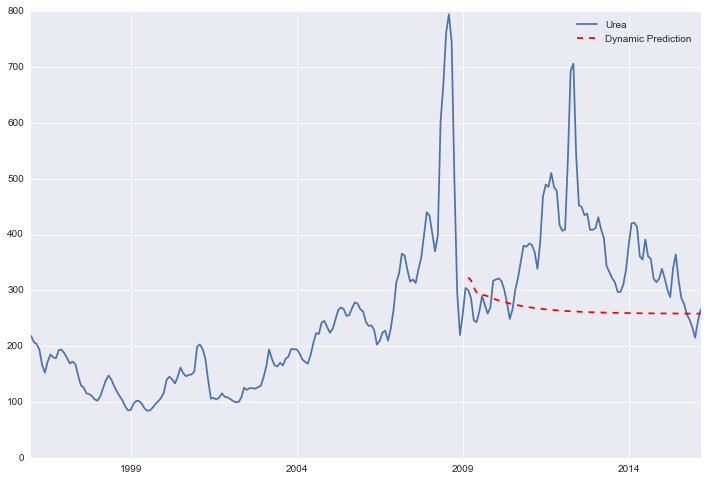

In [51]:
ax = df.ix['1996-01-31':].plot(figsize=(12,8))
ax = predict_urea30.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();

In [52]:
print ("MFE = ", mean_forecast_err(df['Urea'], predict_urea30))
print ("MAE = ", mean_absolute_err(df['Urea'], predict_urea30))
#MFE large model underforecasts

MFE =  91.5030642808012
MAE =  0.34268458436228444


### Model 3 ARMA (2,1)
#### 2 autoregressive terms and one moving average

In [53]:
arma_mod40 = sm.tsa.ARMA(df, (2,1)).fit()

In [60]:
resid40 = arma_mod40.resid

In [55]:
print (arma_mod40.params)

const         259.677755
ar.L1.Urea      1.284356
ar.L2.Urea     -0.353116
ma.L1.Urea      0.326391
dtype: float64


In [56]:
print (arma_mod40.aic, arma_mod40.bic, arma_mod40.hqic)

2350.8009927679327 2368.26629998 2357.83585017


In [57]:
sm.stats.durbin_watson(arma_mod40.resid.values)
#again close to 2

1.9065111906505894

In [58]:
predict_urea40 = arma_mod40.predict('2009-03-31', '2016-03-31', dynamic=True)

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [61]:
stats.normaltest(resid40)

NormaltestResult(statistic=76.860520599204634, pvalue=2.0415029591951086e-17)

In [62]:
print ("MFE = ", mean_forecast_err(df['Urea'], predict_urea40))
print ("MAE = ", mean_absolute_err(df['Urea'], predict_urea40))
#MFE large model underforecasts

MFE =  91.3252038006987
MAE =  0.34207941095324473


### Model 5 ARIMA(3,0,2)
#### 3 autoregressive terms, no differences, and 2 moving averages

In [66]:
arima_mod1 = sm.tsa.ARIMA(df, (3,0,2)).fit()

In [67]:
print (arima_mod1.params)

const         255.833032
ar.L1.Urea      2.054403
ar.L2.Urea     -1.603160
ar.L3.Urea      0.532517
ma.L1.Urea     -0.450021
ma.L2.Urea     -0.027917
dtype: float64


In [68]:
sm.stats.durbin_watson(arima_mod1.resid.values)
#still close to 2

1.9727162727822198

In [69]:
print (arima_mod1.aic, arima_mod1.bic, arima_mod1.hqic)

2335.522032183419 2359.97346229 2345.37083254


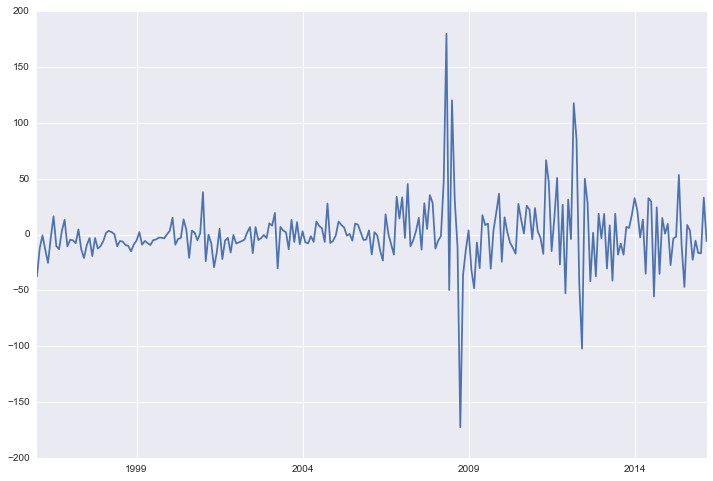

In [70]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arima_mod1.resid.plot(ax=ax);

In [72]:
resid1 = arima_mod1.resid
stats.normaltest(resid1)

NormaltestResult(statistic=79.287139455069251, pvalue=6.0675927590689176e-18)

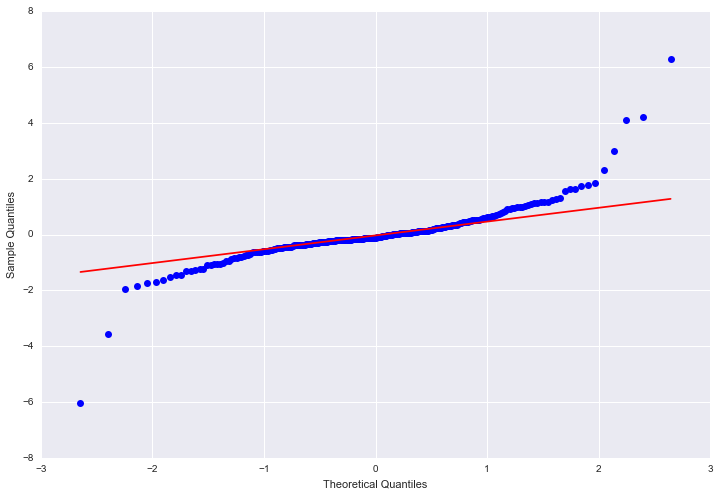

In [73]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

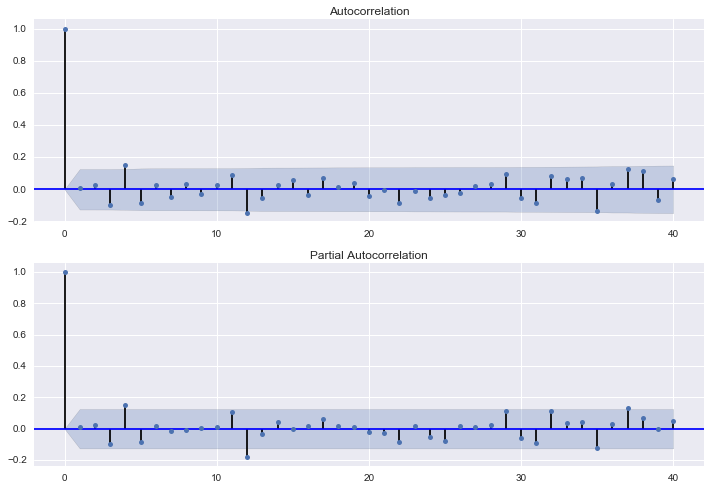

In [74]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

In [75]:
r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))
#all lags significant

           AC          Q  Prob(>Q)
lag                               
1    0.009967   0.024439  0.875772
2    0.024143   0.168429  0.919234
3   -0.096648   2.485553  0.477908
4    0.150877   8.156042  0.086027
5   -0.083652   9.906477  0.077929
6    0.025462  10.069341  0.121762
7   -0.047230  10.632056  0.155493
8    0.032041  10.892142  0.207886
9   -0.026527  11.071175  0.270862
10   0.028352  11.276566  0.336381
11   0.089792  13.345554  0.271341
12  -0.147916  18.984431  0.088905
13  -0.053670  19.730027  0.102149
14   0.025295  19.896374  0.133443
15   0.058609  20.793317  0.143564
16  -0.037236  21.156964  0.172556
17   0.070411  22.462988  0.167563
18   0.016671  22.536525  0.209033
19   0.040973  22.982716  0.238104
20  -0.043335  23.484075  0.265655
21  -0.004738  23.490096  0.318414
22  -0.087126  25.535032  0.272180
23  -0.011157  25.568715  0.321644
24  -0.053574  26.348977  0.335699
25  -0.034997  26.683463  0.371881
26  -0.023024  26.828896  0.418348
27   0.021368  26.95

In [76]:
predict_urea1 = arima_mod1.predict('2009-03-31', '2016-03-31', dynamic=True)
print (predict_urea1)

2009-03-31    348.614323
2009-04-30    370.209567
2009-05-31    367.848115
2009-06-30    352.000882
2009-07-31    334.729912
2009-08-31    323.396522
2009-09-30    319.362376
2009-10-31    320.046762
2009-11-30    321.884921
2009-12-31    322.415806
2010-01-31    320.924043
2010-02-28    317.987117
2010-03-31    314.627731
2010-04-30    311.640171
2010-05-31    309.324188
2010-06-30    307.566833
2010-07-31    306.078481
2010-08-31    304.604827
2010-09-30    303.027593
2010-10-31    301.357248
2010-11-30    299.669500
2010-12-31    298.040110
2011-01-31    296.508932
2011-02-28    295.076691
2011-03-31    293.721337
2011-04-30    292.417627
2011-05-31    291.149437
2011-06-30    289.912371
2011-07-31    288.709802
2011-08-31    287.547123
                 ...    
2013-10-31    268.349860
2013-11-30    267.910233
2013-12-31    267.486049
2014-01-31    267.076763
2014-02-28    266.681853
2014-03-31    266.300813
2014-04-30    265.933156
2014-05-31    265.578411
2014-06-30    265.236126


C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


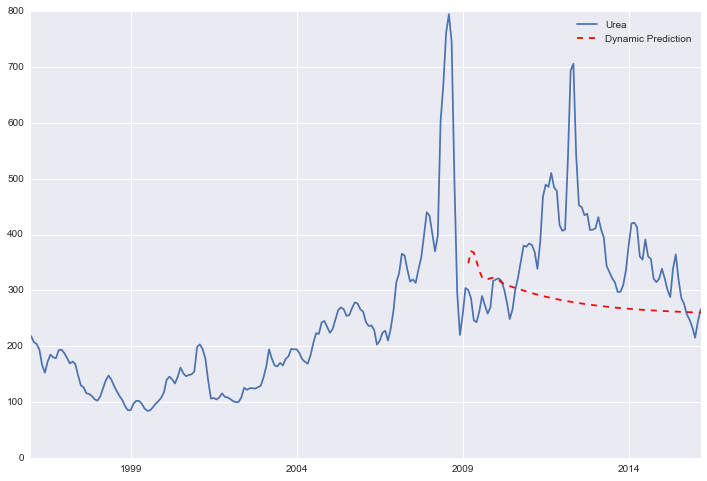

In [78]:
ax = df.ix['1996-01-31':].plot(figsize=(12,8))
ax = predict_urea1.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();

In [79]:
print ("MFE = ", mean_forecast_err(df['Urea'], predict_urea1))
print ("MAE = ", mean_absolute_err(df['Urea'], predict_urea1))

MFE =  74.06692043683526
MAE =  0.26171552889149036


### Summary of Models (no 4 or 6)

In [81]:
print ("Model 1: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print ("Model 2: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print ("Model 3: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
#print ("Model 4: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print ("Model 5: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
#print ("Model 6: ARIMA(2,0,3)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)

#model 2 generally lower aic bic hqic

Model 1: ARMA(2,0)     AIC 2365.5461544753434  BIC 2379.51840025  HQIC 2371.1740404
Model 2: ARMA(3,0)     AIC 2337.239831246713  BIC 2354.70513846  HQIC 2344.27468865
Model 3: ARMA(2,1)     AIC 2350.8009927679327 BIC 2368.26629998  HQIC 2357.83585017
Model 5: ARIMA(3,0,2)  AIC 2335.522032183419  BIC 2359.97346229  HQIC 2345.37083254


In [82]:
print ("Metrics for Model 1 ARMA(2,0):    ",mean_forecast_err(df['Urea'], predict_urea20)," MFE  ", mean_absolute_err(df['Urea'], predict_urea20),"MAE")
print ("Metrics for Model 2 ARMA(3,0):    ",mean_forecast_err(df['Urea'], predict_urea30)," MFE  ", mean_absolute_err(df['Urea'], predict_urea30),"MAE")
print ("Metrics for Model 3 ARMA(2,1):    ",mean_forecast_err(df['Urea'], predict_urea40)," MFE  ", mean_absolute_err(df['Urea'], predict_urea40),"MAE")
#print ("Metrics for Model 4 ARMA(2,3):    ",mean_forecast_err(df['Monthly Imports'], predict_monthlyimports50)," MFE  ", mean_absolute_err(df['Monthly Imports'], predict_monthlyimports50),"MAE")
print ("Metrics for Model 5 ARIMA(3,0,2): ",mean_forecast_err(df['Urea'], predict_urea1)," MFE  ", mean_absolute_err(df['Urea'], predict_urea1),"MAE")
#print ("Metrics for Model 6 ARIMA(2,0,3): ",mean_forecast_err(df['Monthly Imports'], predict_monthlyimports2)," MFE  ",mean_absolute_err(df['Monthly Imports'],predict_monthlyimports2),"MAE")

#model 5 has lowest errors

Metrics for Model 1 ARMA(2,0):     90.24206425200329  MFE   0.33705775990895326 MAE
Metrics for Model 2 ARMA(3,0):     91.5030642808012  MFE   0.34268458436228444 MAE
Metrics for Model 3 ARMA(2,1):     91.3252038006987  MFE   0.34207941095324473 MAE
Metrics for Model 5 ARIMA(3,0,2):  74.06692043683526  MFE   0.26171552889149036 MAE


### Creating and Comparing More Models

In [85]:
arma_mod10 = sm.tsa.ARMA(df, (1,0)).fit()
arma_mod20 = sm.tsa.ARMA(df, (2,0)).fit()
arma_mod30 = sm.tsa.ARMA(df, (3,0)).fit()
arma_mod40 = sm.tsa.ARMA(df, (2,1)).fit()
#arma_mod50 = sm.tsa.ARMA(df, (2,3)).fit()
arima_mod1 = sm.tsa.ARIMA(df, (3,0,2)).fit()
arima_mod2 = sm.tsa.ARIMA(df, (2,0,2)).fit()
arima_mod3 = sm.tsa.ARIMA(df, (1,0,0)).fit()
arima_mod4 = sm.tsa.ARIMA(df, (0,1,0)).fit()
arima_mod5 = sm.tsa.ARIMA(df, (0,0,1)).fit()
arima_mod6 = sm.tsa.ARIMA(df, (1,1,0)).fit()
arima_mod7 = sm.tsa.ARIMA(df, (0,1,1)).fit()
arima_mod8 = sm.tsa.ARIMA(df, (1,1,1)).fit()
#arima_mod9 = sm.tsa.ARIMA(df, (3,0,3)).fit()
arima_mod10= sm.tsa.ARIMA(df, (1,0,6)).fit()
arima_mod11= sm.tsa.ARIMA(df, (1,0,3)).fit()

In [87]:
print ("Model 01: ARMA(1,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print ("Model 02: ARMA(2,0)     AIC", arma_mod20.aic, " BIC", arma_mod20.bic, " HQIC", arma_mod20.hqic)
print ("Model 03: ARMA(3,0)     AIC", arma_mod30.aic, " BIC", arma_mod30.bic, " HQIC", arma_mod30.hqic)
print ("Model 04: ARMA(2,1)     AIC", arma_mod40.aic, "BIC", arma_mod40.bic, " HQIC", arma_mod40.hqic)
#print ("Model 05: ARMA(2,3)     AIC", arma_mod50.aic, " BIC", arma_mod50.bic, " HQIC", arma_mod50.hqic)
print ("Model 06: ARIMA(3,0,2)  AIC", arima_mod1.aic, " BIC", arima_mod1.bic, " HQIC", arima_mod1.hqic)
print ("Model 07: ARIMA(2,0,2)  AIC", arima_mod2.aic, " BIC", arima_mod2.bic, " HQIC", arima_mod2.hqic)
print ("Model 08: ARIMA(1,0,0)  AIC", arima_mod3.aic, " BIC", arima_mod3.bic, " HQIC", arima_mod3.hqic)
print ("Model 09: ARIMA(0,1,0)  AIC", arima_mod4.aic, " BIC", arima_mod4.bic, " HQIC", arima_mod4.hqic)
print ("Model 10: ARIMA(0,0,1)  AIC", arima_mod5.aic, " BIC", arima_mod5.bic, " HQIC", arima_mod5.hqic)
print ("Model 11: ARIMA(1,1,0)  AIC", arima_mod6.aic, " BIC", arima_mod6.bic, " HQIC", arima_mod6.hqic)
print ("Model 12: ARIMA(0,1,1)  AIC", arima_mod7.aic, " BIC", arima_mod7.bic, " HQIC", arima_mod7.hqic)
print ("Model 13: ARIMA(1,1,1)  AIC", arima_mod8.aic, " BIC", arima_mod8.bic, " HQIC", arima_mod8.hqic)
#print "Model 14: ARIMA(3,0,3)  AIC", arima_mod9.aic, " BIC", arima_mod9.bic, " HQIC", arima_mod9.hqic
print ("Model 15: ARIMA(1,0,6)  AIC", arima_mod10.aic, " BIC", arima_mod10.bic, " HQIC", arima_mod10.hqic)
print ("Model 16: ARIMA(1,0,3)  AIC", arima_mod11.aic, " BIC", arima_mod11.bic, "HQIC", arima_mod11.hqic)
#model 7 best

Model 01: ARMA(1,0)     AIC 2365.5461544753434  BIC 2379.51840025  HQIC 2371.1740404
Model 02: ARMA(2,0)     AIC 2365.5461544753434  BIC 2379.51840025  HQIC 2371.1740404
Model 03: ARMA(3,0)     AIC 2337.239831246713  BIC 2354.70513846  HQIC 2344.27468865
Model 04: ARMA(2,1)     AIC 2350.8009927679327 BIC 2368.26629998  HQIC 2357.83585017
Model 06: ARIMA(3,0,2)  AIC 2335.522032183419  BIC 2359.97346229  HQIC 2345.37083254
Model 07: ARIMA(2,0,2)  AIC 2335.928991880899  BIC 2356.88736054  HQIC 2344.37082076
Model 08: ARIMA(1,0,0)  AIC 2447.467846488811  BIC 2457.94703082  HQIC 2451.68876093
Model 09: ARIMA(0,1,0)  AIC 2438.37409849  BIC 2445.35197394  HQIC 2441.18503747
Model 10: ARIMA(0,0,1)  AIC 2794.9769418923233  BIC 2805.45612622  HQIC 2799.19785633
Model 11: ARIMA(1,1,0)  AIC 2366.6346097182777  BIC 2377.1014229  HQIC 2370.85101818
Model 12: ARIMA(0,1,1)  AIC 2357.8868608334774  BIC 2368.35367401  HQIC 2362.1032693
Model 13: ARIMA(1,1,1)  AIC 2349.164793930753  BIC 2363.12054484  HQ

In [88]:
predict_urea10 = arma_mod10.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea20 = arma_mod20.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea30 = arma_mod30.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea40 = arma_mod40.predict('2009-03-31', '2016-03-31', dynamic=True)
#predict_monthlyimports50 = arma_mod50.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea1 = arima_mod1.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea2 = arima_mod2.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea3 = arima_mod3.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea4 = arima_mod4.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea5 = arima_mod5.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea6 = arima_mod6.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea7 = arima_mod7.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea8 = arima_mod8.predict('2009-03-31', '2016-03-31', dynamic=True)
#predict_sunspots9 = arima_mod9.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea10 = arima_mod10.predict('2009-03-31', '2016-03-31', dynamic=True)
predict_urea11 = arima_mod11.predict('2009-03-31', '2016-03-31', dynamic=True)

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [89]:
print ("Metrics for Model 01 ARMA(1,0):    ",mean_forecast_err(df['Urea'], predict_urea10)," MFE  ",mean_absolute_err(df['Urea'], predict_urea10),"MAE")
print ("Metrics for Model 02 ARMA(2,0):    ",mean_forecast_err(df['Urea'], predict_urea20)," MFE  ", mean_absolute_err(df['Urea'], predict_urea20),"MAE")
print ("Metrics for Model 03 ARMA(3,0):    ",mean_forecast_err(df['Urea'], predict_urea30)," MFE  ", mean_absolute_err(df['Urea'], predict_urea30),"MAE")
print ("Metrics for Model 04 ARMA(2,1):    ",mean_forecast_err(df['Urea'], predict_urea40)," MFE  ", mean_absolute_err(df['Urea'], predict_urea40),"MAE")
#print ("Metrics for Model 05 ARMA(2,3):    ",mean_forecast_err(df['Monthly Imports'], predict_monthlyimports50)," MFE  ", mean_absolute_err(df['Monthly Imports'], predict_monthlyimports50),"MAE")
print ("Metrics for Model 06 ARIMA(3,0,2): ",mean_forecast_err(df['Urea'], predict_urea1)," MFE  ", mean_absolute_err(df['Urea'], predict_urea1),"MAE")
print ("Metrics for Model 07 ARIMA(2,0,2): ",mean_forecast_err(df['Urea'], predict_urea2)," MFE  ", mean_absolute_err(df['Urea'], predict_urea2),"MAE")
print ("Metrics for Model 08 ARIMA(1,0,0): ",mean_forecast_err(df['Urea'], predict_urea3)," MFE  ", mean_absolute_err(df['Urea'], predict_urea3),"MAE")
print ("Metrics for Model 09 ARIMA(0,1,0): ",mean_forecast_err(df['Urea'], predict_urea4)," MFE  ", mean_absolute_err(df['Urea'], predict_urea4),"MAE")
print ("Metrics for Model 10 ARIMA(0,0,1): ",mean_forecast_err(df['Urea'], predict_urea5)," MFE  ", mean_absolute_err(df['Urea'], predict_urea5),"MAE")
print ("Metrics for Model 11 ARIMA(1,1,0): ",mean_forecast_err(df['Urea'], predict_urea6)," MFE  ", mean_absolute_err(df['Urea'], predict_urea6),"MAE")
print ("Metrics for Model 12 ARIMA(0,1,1): ",mean_forecast_err(df['Urea'], predict_urea7)," MFE  ", mean_absolute_err(df['Urea'], predict_urea7),"MAE")
print ("Metrics for Model 13 ARIMA(1,1,1): ",mean_forecast_err(df['Urea'], predict_urea8)," MFE  ", mean_absolute_err(df['Urea'], predict_urea8),"MAE")
#print "Metrics for Model 14 ARIMA(3,0,3): ",mean_forecast_err(dta.SUNACTIVITY, predict_sunspots9)," MFE  ", mean_absolute_err(dta.SUNACTIVITY, predict_sunspots9),"MAE"
print ("Metrics for Model 15 ARIMA(1,0,6): ",mean_forecast_err(df['Urea'], predict_urea10)," MFE  ", mean_absolute_err(df['Urea'], predict_urea10),"MAE")
print ("Metrics for Model 16 ARIMA(1,0,3): ",mean_forecast_err(df['Urea'], predict_urea11), "MFE ",mean_absolute_err(df['Urea'],predict_urea11),"MAE")
#model 1 best

Metrics for Model 01 ARMA(1,0):     60.250760665404314  MFE   0.20322715536892372 MAE
Metrics for Model 02 ARMA(2,0):     90.24206425200329  MFE   0.33705775990895326 MAE
Metrics for Model 03 ARMA(3,0):     91.5030642808012  MFE   0.34268458436228444 MAE
Metrics for Model 04 ARMA(2,1):     91.3252038006987  MFE   0.34207941095324473 MAE
Metrics for Model 06 ARIMA(3,0,2):  74.06692043683526  MFE   0.26171552889149036 MAE
Metrics for Model 07 ARIMA(2,0,2):  91.30330827583144  MFE   0.34189344224959034 MAE
Metrics for Model 08 ARIMA(1,0,0):  89.29489413687473  MFE   0.3315296350195436 MAE
Metrics for Model 09 ARIMA(0,1,0):  358.9338624210016  MFE   1819.0993655682155 MAE
Metrics for Model 10 ARIMA(0,0,1):  99.3663219933596  MFE   0.38257575404748695 MAE
Metrics for Model 11 ARIMA(1,1,0):  358.3083582953818  MFE   1359.1003350148123 MAE
Metrics for Model 12 ARIMA(0,1,1):  358.8307913617183  MFE   1939.993182410461 MAE
Metrics for Model 13 ARIMA(1,1,1):  358.6075015706828  MFE   1760.520449

C:\Users\msteinme\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1724: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


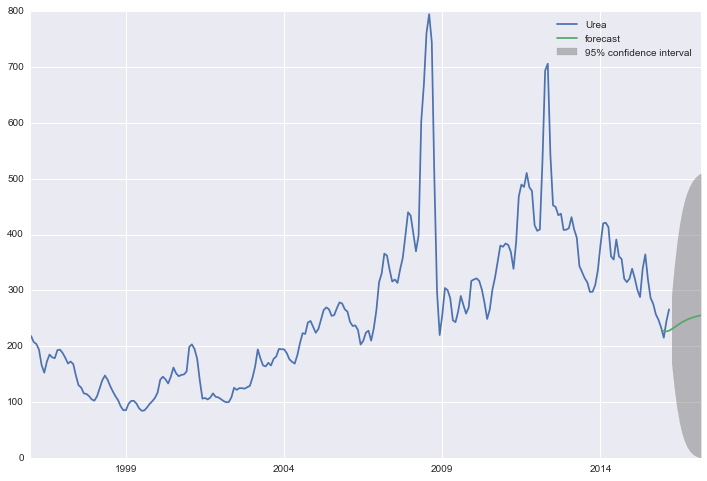

In [90]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = df.ix['1996-01-31':].plot(ax=ax)
fig = arma_mod20.plot_predict('2016-01-31', '2017-03-31', dynamic=True, ax=ax, plot_insample=False)

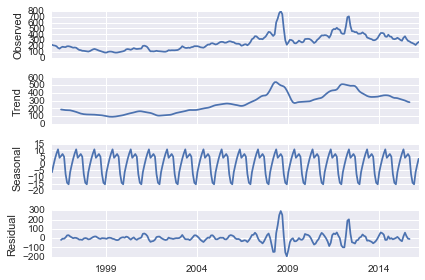

In [96]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(df)
resplot = res.plot()

### seasonal ARIMA

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime

In [33]:
# Fit the model
mod = sm.tsa.SARIMAX(df['Urea'], trend='c', order=(1,1,1))
res = mod.fit()
print (res.summary())

AttributeError: module 'statsmodels.tsa.api' has no attribute 'SARIMAX'